# Unit 2 EDA (разведывательный анализ данных)

## План ноутбука:

1. Формулировка задания
- Описание датасета
- Функции, которые будут использоваться в анализе, написанные обучающимся
- Первичный осмотр
- Разделение данных по типу
- Анализ пропусков
- Анализ численных данных
- Корреляционный анализ данных
- Анализ качественных (категориальных) данных
- Удаление и заполнение пустых ячеек
- Предфинальный анализ
- Выводы

Подготовил Кирилл Сапунов

# 1. Формулировка задания

*Вас пригласили поучаствовать в одном из проектов UNICEF — международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру.*

*Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.*

*И сделать это можно с помощью модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы (вот она, сила ML!). Чтобы определиться с параметрами будущей модели, проведите разведывательный анализ данных и составьте отчёт по его результатам.*

# 2. Описание датасета

1. school — аббревиатура школы, в которой учится ученик
2. sex — пол ученика ('F' - женский, 'M' - мужской)
3. age — возраст ученика (от 15 до 22)
4. address — тип адреса ученика ('U' - городской, 'R' - за городом)
5. famsize — размер семьи('LE3' <= 3, 'GT3' >3)
6. Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
7. Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
8. Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
9. Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
10. Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
11. reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
12. guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
13. traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
14. studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
15. failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
16. schoolsup — дополнительная образовательная поддержка (yes или no)
17. famsup — семейная образовательная поддержка (yes или no)
18. paid — дополнительные платные занятия по математике (yes или no)
19. activities — дополнительные внеучебные занятия (yes или no)
20. nursery — посещал детский сад (yes или no)
21. higher — хочет получить высшее образование (yes или no)
22. internet — наличие интернета дома (yes или no)
23. romantic — в романтических отношениях (yes или no)
24. famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
25. freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
26. goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
27. health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
28. absences — количество пропущенных занятий
29. score — баллы по госэкзамену по математике

## Проведите первичную обработку данных. Так как данных много, стоит написать функции, которые можно применять к столбцам определённого типа.

- Посмотрите на распределение признака для числовых переменных, устраните выбросы.
- Оцените количество уникальных значений для номинативных переменных.
- По необходимости преобразуйте данные
- Проведите корреляционный анализ количественных переменных
- Отберите не коррелирующие переменные.
- Проанализируйте номинативные переменные и устраните те, которые не влияют на предсказываемую величину (в нашем случае — на переменную score).
- Не забудьте сформулировать выводы относительно качества данных и тех переменных, которые вы будете использовать в дальнейшем построении модели.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np
import scipy.stats

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

# 3.Функции, которые будут использоваться в анализе:

## Графические функции

In [2]:
# Цель: Функция, позволяющая быстро и качественно оценить колонку числовых данных
# Функция показывает первый и третий квартили, строит гистограмму данных, оценивает выбросы
# data_column - pandas Series with numerical data
# bins - number of bins on plotted histogram, default value is'default',
#        which means number of unique values in column


def data_column_hist(data_column, bins='default'):

    if type(data_column) is not pd.Series:
        raise ValueError

    if bins == 'default':
        bins = data_column.nunique()

    IQR = data_column.quantile(0.75) - data_column.quantile(0.25)
    perc25 = data_column.quantile(0.25)
    perc75 = data_column.quantile(0.75)

    range_tmp = (data_column.min() - 0.01*IQR, data_column.max() + 0.01*IQR)

    print(
        '25-й перцентиль: {},'.format(perc25),
        '75-й перцентиль: {},'.format(perc75),
        "IQR: {}, ".format(IQR),
        "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR,
                                               l=perc75 + 1.5*IQR))

    data_column.loc[data_column.between(perc25 - 1.5*IQR,
                                        perc75 + 1.5*IQR)].hist(bins=bins,
                                                                range=range_tmp,
                                                                label='hist')

    plt.legend()

In [3]:
# Цель: Функция, позволяющая быстро и качественно оценить колонку качественных данных
# Функция строит коробочный график с усами, показывает выбросы
# data - pandas DataFrame contained all needed data
# column - name of the column of interest (categorical data)
# key_column - name of the column contained target numerical data


def get_boxplot(data, column, key_column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=data.loc[data.loc[:, column].isin(
                    data.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)

    for tmp in data[column].unique():
        print(tmp, data[data[column] == tmp].score.quantile(0.5))

    plt.show()

## Проверка гипотез

### Проверка выборки на нормальность распределения

In [4]:
# Tестирование выборки на нормальность распределения выборки порядковых переменных

# Тест Пирсона (тест хи-квадрат)
# data - pandas DataFrame contained all needed data
# column - name of the column of interest (categorical data)
# alpha - significance level. Usually: 5%, 1%, 0.1%


def norm_test_Pirson_nominative(data, column_name, alpha=0.05):

    samples = data[column_name].unique()
    column_coded = data[column_name].apply(lambda x: np.where(samples == x)[
                                           0][0] if x in samples else np.nan)
    _, p_value = scipy.stats.normaltest(column_coded, nan_policy='omit')

    # scipy.stats.normaltest(a, axis=0, nan_policy='propagate')[source]
    # Test whether a sample differs from a normal distribution.
    # This function tests the null hypothesis that a sample comes from a normal distribution.
    # It is based on D’Agostino and Pearson’s [1], [2] test that combines skew and kurtosis
    # to produce an omnibus test of normality.

    if p_value < alpha:
        #print('The null hypothesis (Data of \"' +column_name+'\" come from a normal distribtion) can be rejected')
        print('Pierson test: N', column_name, round(p_value, 2), alpha)
    else:
        #print('The null hypothesis (Data of \"' +column_name+'\" come from a normal distribtion) cannot rejected')
        print('Pierson test: Y', column_name, round(p_value, 2), alpha)
    return None


# Тест Шапиро-Уилка
# data - pandas DataFrame contained all needed data
# column - name of the column of interest (categorical data)
# alpha - significance level. Usually: 5%, 1%, 0.1%

def norm_test_Shapiro_nominative(data, column_name, alpha=0.05):

    samples = data[column_name].unique()
    column_coded = data[column_name].apply(lambda x: np.where(
        samples == x)[0][0] if x in samples else len(samples)+1)
    column_coded = column_coded.tolist()
    column_coded[:] = [x for x in column_coded if x != len(samples)+1]
    _, p_value = scipy.stats.shapiro(column_coded)

    if p_value < alpha:
        #print('The null hypothesis (Data of \"' +column_name+'\" come from a normal distribtion) can be rejected')
        print('Shapiro test: N', column_name, p_value, alpha)
    else:
        #print('The null hypothesis (Data of \"' +column_name+'\" come from a normal distribtion) cannot rejected')
        print('Shapiro test: Y', column_name, round(p_value, 3), alpha)
    return None

In [5]:
# Тестирование на нормальность распределения каждой выборки,
# образованных значениями ключевой числовой характеристики,
# соответствующей значению из столбца номинативных переменных (первых 10 по величине частот)


# Тест Пирсона (тест хи-квадрат)
# data - pandas DataFrame contained all needed data
# column - name of the column of interest (categorical data)
# key_column - name of the column contained target numerical data
# alpha - significance level. Usually: 5%, 1%, 0.1%

def norm_test_Pirson(data, column_name, key_column, alpha=0.05):

    nom_values = data[column_name].unique()[:10]
    nom_values = [x for x in nom_values if not pd.isnull(x)]

    answer = []

    for nom_value in nom_values:
        sample = data[data[column_name] == nom_value][key_column]
        if len(sample) >= 8:
            _, p_value = scipy.stats.normaltest(sample, nan_policy='omit')
            if p_value < alpha:
                # Does not come from normal distribution
                print('Pierson test: N', key_column +
                      ' @ ' + column_name + ' =', nom_value)
                answer.append(False)
            else:
                # Comes from normal distribution
                print('Pierson test: Y', key_column +
                      ' @ ' + column_name + ' =', nom_value)
                answer.append(True)
        else:
            print('Pierson test could not be performed because of sample length, case: ' +
                  column_name + ' =', nom_value)
            answer.append(None)
    return answer


# Тест Шапиро-Уилка
# data - pandas DataFrame contained all needed data
# column - name of the column of interest (categorical data)
# key_column - name of the column contained target numerical data
# alpha - significance level. Usually: 5%, 1%, 0.1%

def norm_test_Shapiro(data, column_name, key_column, alpha=0.05):

    nom_values = data[column_name].unique()[:10]
    nom_values = [x for x in nom_values if not pd.isnull(x)]

    answer = []

    for nom_value in nom_values:
        sample = data[data[column_name] == nom_value][key_column]
        if len(sample) >= 3:
            _, p_value = scipy.stats.shapiro(sample)
            if p_value < alpha:
                # Does not come from normal distribution
                print('Shapiro test: N', key_column +
                      ' @ ' + column_name + ' =', nom_value)
                answer.append(False)
            else:
                # Comes from normal distribution
                print('Shapiro test: Y', key_column +
                      ' @ ' + column_name + ' =', nom_value)
                answer.append(True)
        else:
            print('Shapiro test could not be performed because of sample length, case: ' +
                  column_name + ' =', nom_value)
            answer.append(None)

    return answer

### Проверка нулевой гипотезы, утверждающей что две или больше выборки имеют равные ожидаемые средние величины

In [6]:
# Тест Стьюдента (T-test) с поправкой Бонферони для случая, когда выборок больше 2-х
# Условия: выборки имеют нормальное распределение, а также имеют одинаковые дисперсии
# Дополнительно: данная функция может использоваться для двух и более выборок
# data - pandas DataFrame contained all needed data
# column - name of the column of interest (categorical data)
# key_column - name of the column contained target numerical data
# alpha - significance level. Usually: 5%, 1%, 0.1%


def diff_test_t(data, column_name, key_column, alpha=0.05):
    cols = data.loc[:, column_name].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        data1 = data[data[column_name] == comb[0]][key_column]
        data2 = data[data[column_name] == comb[1]][key_column]
        p_value = ttest_ind(data1, data2, nan_policy='omit').pvalue
        if p_value <= alpha/len(combinations_all):  # Учли поправку Бонферони
            # Different distribution
            print('Student test: N', key_column + ' @ ' + str(comb),
                  round(p_value, 3), round(alpha/len(combinations_all), 3))
            return False
        else:
            # Same distribution
            print('Student test: Y', key_column + ' @ ' + str(comb),
                  round(p_value, 3), round(alpha/len(combinations_all), 3))
    return True

# Тест Манна-Уитни-Уилкинсона (U-test)
# Условия: простой непараметрический критерий, каждая выборка должна иметь не менее 20 значений
# Дополнительно: данная функция может использовать только(!) для двух выборок


def diff_test_Mann_Whitney(data, column_name, key_column, alpha=0.05):

    cols = data.loc[:, column_name].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))

    for comb in combinations_all:
        data1 = data[data[column_name] == comb[0]][key_column]
        data2 = data[data[column_name] == comb[1]][key_column]
        stat, p_value = scipy.stats.mannwhitneyu(data1, data2)
        if p_value > alpha:
            # Same distribution
            print('Mann-Whitney test: Y', key_column +
                  ' @ ' + str(comb), round(p_value, 3), alpha)
        else:
            # Different distribution
            print('Mann-Whitney test: N', key_column +
                  ' @ ' + str(comb), round(p_value, 3), alpha)
            return False
    # return combinations_all
    return True


# Тест Краскела-Уоллиса (H-test)
# Условия: многомерное обобщение критерия Уилкинсона-Манна-Уитни, каждая выборка должна иметь не менее 5 значений
# Дополнительно: данная функция может использоваться для трёх и более выборок
# data - pandas DataFrame contained all needed data
# column - name of the column of interest (categorical data)
# key_column - name of the column contained target numerical data
# alpha - significance level. Usually: 5%, 1%, 0.1%

def diff_test_Kruskal_Wallis(data, column_name, key_column, alpha=0.05):

    nom_values = data[column_name].unique()[:10]
    nom_values = [x for x in nom_values if not pd.isnull(x)]
    data_separated = [data[data[column_name] == nom_value]
                      [key_column] for nom_value in nom_values]

    stat, p_value = scipy.stats.kruskal(*data_separated, nan_policy='omit')

    if p_value > alpha:
        # Same distribution
        print('Kruskal-Wallis test: Y', key_column +
              ' @ ' + column_name, round(p_value, 3), alpha)
        return True
    else:
        # Different distribution
        print('Kruskal-Wallis test: N', key_column +
              ' @ ' + column_name, round(p_value, 3), alpha)
        return False
    # return stat, p_value
    return None

In [7]:
# Анализ столбца номинативных переменных.
# Условия: очищенные данные
# data - pandas DataFrame contained all needed data
# column - name of the column of interest (categorical data)
# key_column - name of the column contained target numerical data
# alpha - significance level. Usually: 5%, 1%, 0.1%

# Строит коробочный график с усами, формулируется нулевая гипотеза
# H_0: статистических различий для среднего при разбиении ключевой переменной по категориям номинального столбца нет
# Для тестирования, во-первых, определяется удовлетворение нормальности для каждой подвыборки.
# Если условие нормальности выполнено, то применяется критерий Стьюдента,
# иначе критерий Манна-Уитни-Уилкинсона, если категорий 2,
# или критерий Краскела-Уоллиса, если категорий больше 2.


def nominal_analysis(data, column_name, key_column, alpha=0.05):
    get_boxplot(data=data, column=column_name, key_column=key_column)

    P_test = norm_test_Pirson(
        data=data, column_name=column_name, key_column=key_column, alpha=alpha)
    print('')
    S_test = norm_test_Shapiro(
        data=data, column_name=column_name, key_column=key_column, alpha=alpha)
    print('')

    if all(P_test) or all(S_test):
        answer = diff_test_t(data=data, column_name=column_name,
                             key_column=key_column, alpha=alpha)
    else:
        if data[column_name].nunique() == 2:
            answer = diff_test_Mann_Whitney(
                data=data, column_name=column_name, key_column=key_column, alpha=alpha)
        else:
            answer = diff_test_Kruskal_Wallis(
                data=data, column_name=column_name, key_column=key_column, alpha=alpha)
    return answer

## Генерация случайных величин

In [8]:
import random

random.seed(985800)
# Генератор случайной дискретной величины по заданным пропорциям


def weighted_random(weights):
    number = random.random() * sum(weights.values())
    for k, v in weights.items():
        if number < v:
            break
        number -= v
    return k

# Example
### weights = {'x': 1, 'y': 1, 'z': 2}

# 4. Первичный осмотр данных

In [9]:
data = pd.read_csv('stud_math.csv')  # в этот датасет будут вноситься изменения
# в этом датасете будут удаляться все строки с пустыми ячейками
data_purified = pd.read_csv('stud_math.csv')
# этот датасет будет использоваться для анализа во избежание искажения данных
data_full = pd.read_csv('stud_math.csv')

In [10]:
len_data = len(data)
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [11]:
data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Columns: 30 entries, school to score
dtypes: float64(12), int64(1), object(17)
memory usage: 92.7+ KB


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Всего строк: $395$, что как-то мало.

Полностью значения наличествуют в следующих столбцах: *school, sex, age*

# 5. Разделение данных по типу

**Числовые**

 - **Дискретные:**
     1. age
     2. absences
     2. failures
     
 -  **Непрерывные:**
     1. score
 
    
**Категориальные**


 - **Номинальные*:**
     
     1. school (2)
     2. sex (2)
     3. address (2)
     4. Pstatus (2)
     5. Mjob (5)
     6. Fjob (5)
     7. reason (4)
     8. guardian (3)
     9. schoolsup (2)
     - famsup (2) 
     - paid (2)
     - activities (2)
     - nursery (2)
     - higher (2)
     - internet (2)
     - romantic (2)
   
\* Здесь и далее в скобках указано количество уникальных значений согласно описания


 - **Порядковые:**
     1. famsize (2)
     2. Medu (2)
     3. Fedu (2)
     4. studytime (4) (к отношениям данных отнести нельзя, так как разница между интервалами разные)
     5. studytime, granular (?)
     6. famrel (5)
     7. freetime (5)
     8. goout (5)
     9. health (5)
     - traveltime (4)

In [13]:
categorical_columns = ['school', 'sex', 'address', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian',
                       'famsize', 'Medu', 'Fedu', 'studytime', 'studytime, granular', 'famrel', 'freetime', 'goout', 'health',
                       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'traveltime']

nominal_columns = ['school', 'sex', 'address', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian',
                   'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

order_columns = ['famsize', 'Medu', 'Fedu', 'studytime', 'studytime, granular',
                 'famrel', 'freetime', 'goout', 'health', 'traveltime']

numerical_columns = ['age', 'absences', 'score', 'failures']

In [14]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


In [15]:
data.describe(include=object)

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,378,368,350,376,359,378,364,386,356,355,381,379,375,361,364
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,295,261,314,133,197,137,250,335,219,200,195,300,356,305,240


# 6. Анализ пустых ячеек

Посмотрим на пустые ячейки и, вероятно, удалим строки их содержащие.
Также оценим выбросы.

In [16]:
# Для аккуратной печати найдём столбец с самым длинным названием
longest_column_name = max(data.columns, key=lambda word: len(word))
len_longest_column = len(longest_column_name)

len_data = len(data)
print('Всего в таблце строк:\t', len_data, '\n')

for column_name in data.columns:
    n_na_cells = len(data[data[column_name].isna()])
    n_empty_cells = len(data[data[column_name].astype(str) == u''])

    if n_na_cells != 0 or n_empty_cells != 0:
        print('В столбце\t', column_name+' '*(len_longest_column-len(column_name)), '\t',
              n_empty_cells, '\tпустых ячеек\t',
              n_na_cells, '\tсодержащих Nan.')

Всего в таблце строк:	 395 

В столбце	 address             	 0 	пустых ячеек	 17 	содержащих Nan.
В столбце	 famsize             	 0 	пустых ячеек	 27 	содержащих Nan.
В столбце	 Pstatus             	 0 	пустых ячеек	 45 	содержащих Nan.
В столбце	 Medu                	 0 	пустых ячеек	 3 	содержащих Nan.
В столбце	 Fedu                	 0 	пустых ячеек	 24 	содержащих Nan.
В столбце	 Mjob                	 0 	пустых ячеек	 19 	содержащих Nan.
В столбце	 Fjob                	 0 	пустых ячеек	 36 	содержащих Nan.
В столбце	 reason              	 0 	пустых ячеек	 17 	содержащих Nan.
В столбце	 guardian            	 0 	пустых ячеек	 31 	содержащих Nan.
В столбце	 traveltime          	 0 	пустых ячеек	 28 	содержащих Nan.
В столбце	 studytime           	 0 	пустых ячеек	 7 	содержащих Nan.
В столбце	 failures            	 0 	пустых ячеек	 22 	содержащих Nan.
В столбце	 schoolsup           	 0 	пустых ячеек	 9 	содержащих Nan.
В столбце	 famsup              	 0 	пустых ячеек	 39 	содержащих

В столбце 'score' содержатся пропущеные значения. Так как это ключевая характеристика ученика, которую, в дальнейшем, должна предсказывать модель, то сейчас имеет смысл эти строки удалить. В будущем, после построения модели, быть может, созданая предсказательная модель поможет в восстановлении упущенных данных)

In [17]:
data = data[data.score.notna()]
data_full = data_full[data_full.score.notna()]
data_purified = data_purified[data_purified.score.notna()]

In [18]:
len_data = len(data)
print('Всего в таблце строк:\t', len_data, '\n')

for column_name in data.columns:
    n_na_cells = len(data[data[column_name].isna()])

    if n_na_cells != 0 or n_empty_cells != 0:
        print('В столбце\t', column_name+' '*(len_longest_column-len(column_name)), '\t',
              n_na_cells, '\tсодержащих Nan.')

Всего в таблце строк:	 389 

В столбце	 address             	 15 	содержащих Nan.
В столбце	 famsize             	 27 	содержащих Nan.
В столбце	 Pstatus             	 45 	содержащих Nan.
В столбце	 Medu                	 3 	содержащих Nan.
В столбце	 Fedu                	 24 	содержащих Nan.
В столбце	 Mjob                	 19 	содержащих Nan.
В столбце	 Fjob                	 36 	содержащих Nan.
В столбце	 reason              	 17 	содержащих Nan.
В столбце	 guardian            	 31 	содержащих Nan.
В столбце	 traveltime          	 28 	содержащих Nan.
В столбце	 studytime           	 7 	содержащих Nan.
В столбце	 failures            	 22 	содержащих Nan.
В столбце	 schoolsup           	 9 	содержащих Nan.
В столбце	 famsup              	 38 	содержащих Nan.
В столбце	 paid                	 39 	содержащих Nan.
В столбце	 activities          	 14 	содержащих Nan.
В столбце	 nursery             	 15 	содержащих Nan.
В столбце	 studytime, granular 	 7 	содержащих Nan.
В столбце	 higher    

Как можно видеть, в оставшихся данных остаётся всё ещё множество пропусков (до $10\%$ на 1 признак). В первую очередь, это столбцы 'Pstatus', 'famsup', 'paid', 'internet', 'romantic'. Удалять такое множество строк, я полагаю, нерационально. Это может негативно сказаться в дальнейшем анализе и оценке влияния параметров на ключевую величину (оценку ученика). Пока что оставим как есть, а в дальнейшем анализе, после оценки выбросов и пр., зададимся вопросом об исключении сиих данных ещё раз.

# 7. Анализ числовых данных

## 7.1. Дискретные
### 7.1.1. age (возраст)

16    103
17     98
15     82
18     80
19     21
20      3
22      1
21      1
Name: age, dtype: int64

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


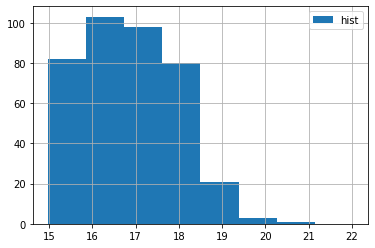

In [19]:
display(data.age.value_counts())
data_column_hist(data.age)

Значения возраста не имеют выбросов, за исключением одного значения в 22 года. Однако, очевидно, что данных для 19-22 лет мало по сравнению с 16, 17, 18 годами в отдельности. Удалим данные учеников возрастом 20+. Это всего 5 строк.

Перед удалением взглянем на корреляцию возраста и оценок:

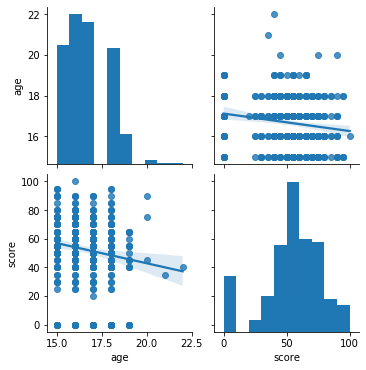

In [20]:
sns.pairplot(data[['age', 'score']], kind='reg')

In [21]:
data[['age', 'score']].corr()

,age,score
age,1.000000,-0.155726
score,-0.155726,1.000000


Таким образом, мы можем сделать предлположение о существовании следующей тенденции: балл за экзамен тем ниже, чем старше экзаменующийся.

In [22]:
data = data[data.age < 20]
data_purified = data_purified[data_purified.age < 20]

### 7.1.2. absences (пропуски)

(-0.386, 38.5]    368
(38.5, 77.0]        4
(77.0, 115.5]       0
(115.5, 154.0]      0
(154.0, 192.5]      0
(192.5, 231.0]      0
(231.0, 269.5]      0
(269.5, 308.0]      0
(308.0, 346.5]      0
(346.5, 385.0]      1
Name: absences, dtype: int64

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


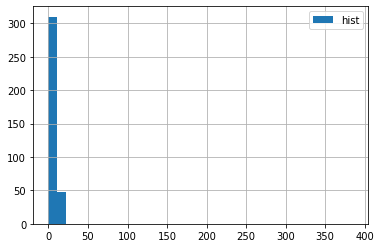

In [23]:
display(data.absences.value_counts(dropna=False, bins=10).sort_index())
data_column_hist(data.absences)

Как мы видим, имеются существенный выброс. Уберём всех, что выходит за эти границы, какие-то злостные прогульщики. Перед этим, посмотрим на их статистику:

In [24]:
data[data.absences > 20]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
40,GP,F,16,U,LE3,T,2.0,2.0,other,other,home,mother,2.0,2.0,1.0,no,NaN,no,yes,no,-6.0,yes,yes,yes,3.0,3.0,3.0,3.0,25.0,55.0
74,GP,F,16,U,GT3,T,3.0,3.0,other,services,home,mother,1.0,2.0,0.0,yes,yes,yes,yes,yes,-6.0,yes,yes,no,4.0,NaN,3.0,5.0,54.0,55.0
103,GP,F,15,U,GT3,T,3.0,2.0,services,other,home,mother,2.0,2.0,0.0,yes,yes,yes,no,yes,-6.0,yes,yes,no,4.0,3.0,5.0,2.0,26.0,30.0
183,GP,F,17,U,LE3,NaN,3.0,3.0,other,other,reputation,mother,1.0,2.0,0.0,no,yes,no,yes,yes,-6.0,yes,yes,yes,5.0,3.0,3.0,1.0,56.0,40.0
198,GP,F,17,U,GT3,NaN,4.0,4.0,services,teacher,home,mother,2.0,1.0,1.0,no,yes,no,no,yes,-3.0,yes,NaN,no,4.0,2.0,4.0,2.0,24.0,90.0
205,GP,F,17,U,GT3,T,3.0,4.0,at_home,services,home,mother,1.0,3.0,1.0,no,yes,yes,no,yes,-9.0,yes,yes,yes,4.0,4.0,3.0,5.0,28.0,45.0
216,GP,F,17,U,GT3,T,4.0,3.0,other,NaN,reputation,mother,1.0,2.0,2.0,no,no,yes,no,yes,-6.0,yes,yes,yes,3.0,4.0,5.0,1.0,22.0,20.0
222,GP,F,16,U,GT3,T,2.0,3.0,services,teacher,other,mother,1.0,2.0,0.0,yes,NaN,no,no,yes,-6.0,yes,yes,no,2.0,3.0,1.0,3.0,385.0,85.0
260,GP,F,18,U,GT3,NaN,4.0,3.0,NaN,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,yes,3.0,1.0,2.0,2.0,21.0,90.0
276,GP,F,18,R,GT3,A,3.0,2.0,other,services,home,mother,2.0,2.0,0.0,no,NaN,no,no,no,-6.0,no,yes,yes,NaN,1.0,1.0,5.0,75.0,45.0


Среди отброшенных по количеству прогулов есть несколько занимательных случаев.
Например, девушка с 385 прогулами возрастом 16 лет, обучалась на дому, где главным педагогом был её родитель (отец). Причиной этого может быть неважное здоровье.

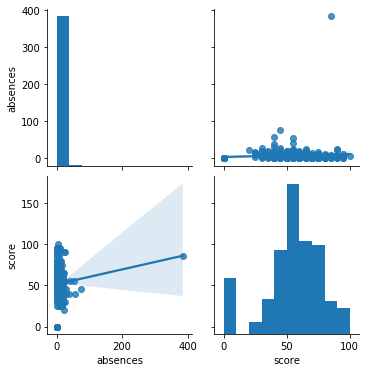

In [25]:
sns.pairplot(data[['absences', 'score']], kind='reg')

In [26]:
data[['absences', 'score']].corr()

,absences,score
absences,1.00000,0.08352
score,0.08352,1.00000


Как мы видим, без очистки данных получается достаточно забавный вывод: чем больше прогулов, тем лучше результат. Хотя, естественно об этом говорить здесь нельзя - данных с большим числом прогулов крайне мало, а выброс вносит существенную коррективу в тренд.

In [27]:
data = data[data.absences < 21]
data_purified = data_purified[data_purified.absences < 21]

### 7.1.3. failures (число внеучебных неудач)

In [28]:
display(data.failures.value_counts(dropna=False).sort_index())

0.0    273
1.0     42
2.0     12
3.0     11
NaN     19
Name: failures, dtype: int64

25-й перцентиль: 0.0, 75-й перцентиль: 0.0, IQR: 0.0,  Границы выбросов: [0.0, 0.0].


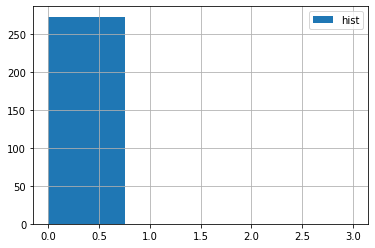

In [29]:
data_column_hist(data.failures)

Подавляющее число представленных учеников не имеет внеучебных неудач. Я полагаю, что мы можем удалить эту колонку за недостаточным количеством данных, которые могли бы помочь в анализе (например, служить фактором изменения оценки). Тем не менее, как и ранее, глянем на корреляцию:

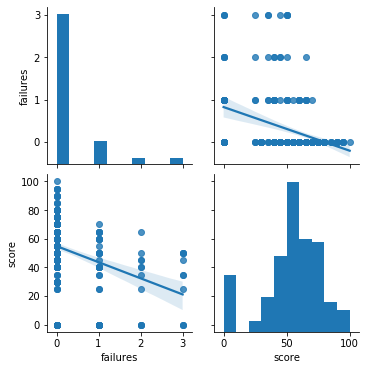

In [30]:
sns.pairplot(data[['failures', 'score']], kind='reg')

In [31]:
data[['failures', 'score']].corr()

,failures,score
failures,1.00000,-0.34041
score,-0.34041,1.00000


Здесь заметна существенная обратная корреляция, позволяющая сформулировать гипотезу: чем больше внеучебных неудач, тем хуже оценка. Это не позволяет нам просто так удалить столбец. Для проверки сформулированной гипотезы необходимо аппробировать данные. Данные независимые, однако о характере распределения мы сказать ничего не можем. Решение об удалении столбца отменяем.
Удалить строки с отсутствующими данными мне бы не хотелось, хоть это и возможно. Главная проблема - это их большое количество. В качестве альтернативы сгенерируем значения, соответствующие пропорциям.

In [32]:
data_purified = data_purified[data_purified.failures.notna()]

weights = data.failures.value_counts().to_dict()
data['failures'] = data['failures'].apply(
    lambda x: x if not pd.isna(x) else weighted_random(weights))

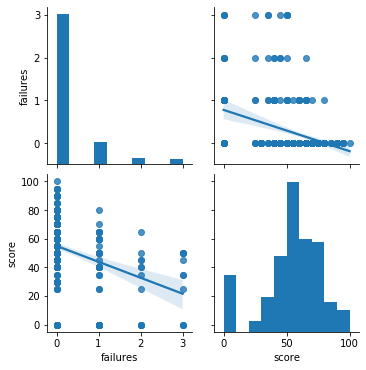

In [33]:
sns.pairplot(data[['failures', 'score']], kind='reg')

In [34]:
data[['failures', 'score']].corr()

,failures,score
failures,1.000000,-0.327774
score,-0.327774,1.000000


## 7.2. Непрерывные
### 7.2.1. score (оценка за экзамен)

In [35]:
display(data.score.value_counts().sort_index())

0.0      36
25.0      7
30.0     14
35.0      8
40.0     25
45.0     23
50.0     53
55.0     42
60.0     29
65.0     30
70.0     27
75.0     30
80.0     16
85.0      3
90.0      8
95.0      5
100.0     1
Name: score, dtype: int64

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


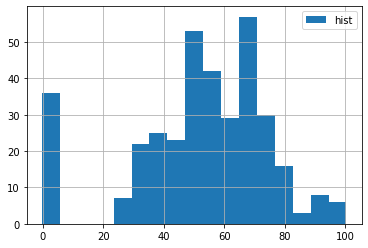

In [36]:
data_column_hist(data.score)

За границу выбросов "выглядывают" только учащиеся, получившие 0 баллов. Полагаю, что их стоит оставить в выборке для будущего анализа как группу несдавших.

## 8. Корреляционный анализ

In [37]:
numerical_columns

['age', 'absences', 'score', 'failures']

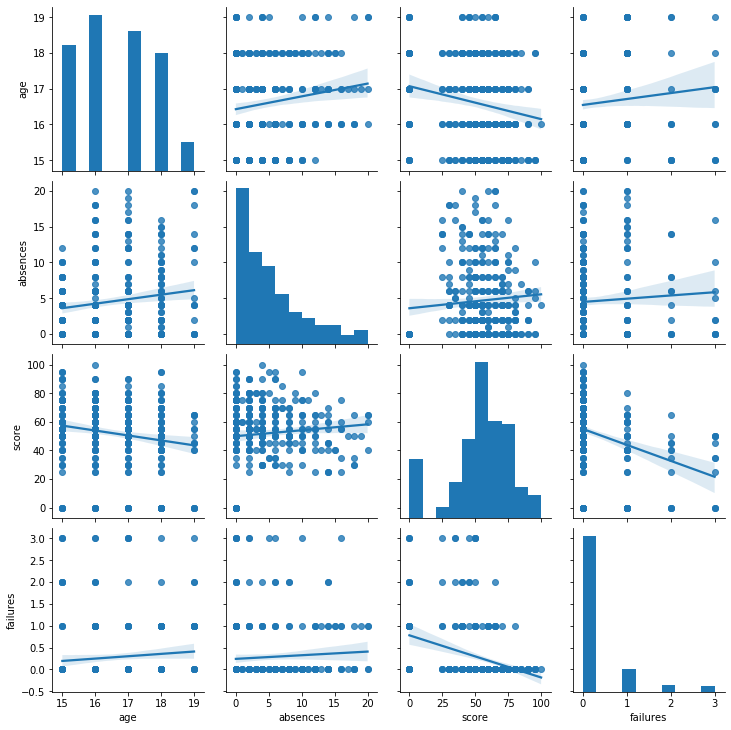

In [38]:
sns.pairplot(data[numerical_columns], kind='reg')

In [39]:
data[numerical_columns].corr()

,age,absences,score,failures
age,1.000000,0.150111,-0.178395,0.094480
absences,0.150111,1.000000,0.089846,0.061396
score,-0.178395,0.089846,1.000000,-0.327774
failures,0.094480,0.061396,-0.327774,1.000000


#### Краткий вывод о числовых данных
Скоррелированных данных нет. Коэффициент корреляции для любой пары значений признаков, кроме пар с ключевым параметром, не превышает $0.15$ по модулю. Потому ни один из столбцов исключить нельзя, оставляем все признаки в таблице.

## 9. Анализ качественных (категориальных) данных

Посмотрим статистику в категориальных колонках.

In [40]:
for column in categorical_columns:
    display(data[column].value_counts(dropna=False))

GP    316
MS     41
Name: school, dtype: int64

F    187
M    170
Name: sex, dtype: int64

U      267
R       77
NaN     13
Name: address, dtype: int64

T      288
NaN     38
A       31
Name: Pstatus, dtype: int64

other       117
services     86
at_home      55
teacher      52
health       31
NaN          16
Name: Mjob, dtype: int64

other       179
services     89
NaN          34
teacher      25
at_home      16
health       14
Name: Fjob, dtype: int64

course        124
reputation     93
home           92
other          31
NaN            17
Name: reason, dtype: int64

mother    226
father     83
NaN        28
other      20
Name: guardian, dtype: int64

GT3    236
LE3     99
NaN     22
Name: famsize, dtype: int64

4.0    120
2.0     93
3.0     86
1.0     52
0.0      3
NaN      3
Name: Medu, dtype: int64

2.0     96
3.0     85
4.0     79
1.0     71
NaN     23
0.0      2
40.0     1
Name: Fedu, dtype: int64

2.0    174
1.0     93
3.0     58
4.0     27
NaN      5
Name: studytime, dtype: int64

-6.0     174
-3.0      93
-9.0      58
-12.0     27
 NaN       5
Name: studytime, granular, dtype: int64

 4.0    163
 5.0     89
 3.0     56
 NaN     26
 2.0     15
 1.0      7
-1.0      1
Name: famrel, dtype: int64

3.0    143
4.0    102
2.0     57
5.0     33
1.0     15
NaN      7
Name: freetime, dtype: int64

3.0    115
2.0     95
4.0     74
5.0     45
1.0     21
NaN      7
Name: goout, dtype: int64

5.0    128
3.0     80
4.0     55
1.0     40
2.0     39
NaN     15
Name: health, dtype: int64

no     304
yes     45
NaN      8
Name: schoolsup, dtype: int64

yes    201
no     122
NaN     34
Name: famsup, dtype: int64

no     183
yes    137
NaN     37
Name: paid, dtype: int64

yes    181
no     162
NaN     14
Name: activities, dtype: int64

yes    274
no      68
NaN     15
Name: nursery, dtype: int64

yes    325
NaN     17
no      15
Name: higher, dtype: int64

yes    273
no      52
NaN     32
Name: internet, dtype: int64

no     219
yes    108
NaN     30
Name: romantic, dtype: int64

1.0    218
2.0     83
NaN     28
3.0     21
4.0      7
Name: traveltime, dtype: int64

Кроме пропущенных значений, выявленных в начале анализа, также присутствуют неверно внесённые данные в стобцах: **'Fedu'** - $40$, **'famrel'** - $-1$. Обработаем их вручную. Я предположу, что данные ошибки есть результат опечаток. То есть должны стоять значения $4$ и $1$ соответственно.

В некоторых столбцах у отдельных значений частота меньше 5, что ставит под сомнение качество анализа этих строк. Решение о том, что делать с такими строками будет приниматься после анализа статистического влияния на ключевую переменную **'score'**.

In [41]:
data.at[data.famrel == -1, 'famrel'] = 1
data.at[data.Fedu == 40, 'Fedu'] = 4

data_full.at[data_full.famrel == -1, 'famrel'] = 1
data_full.at[data_full.Fedu == 40, 'Fedu'] = 4

### 9.1. Номинальные данные


===================================================school===================================================

GP 55.0
MS 50.0


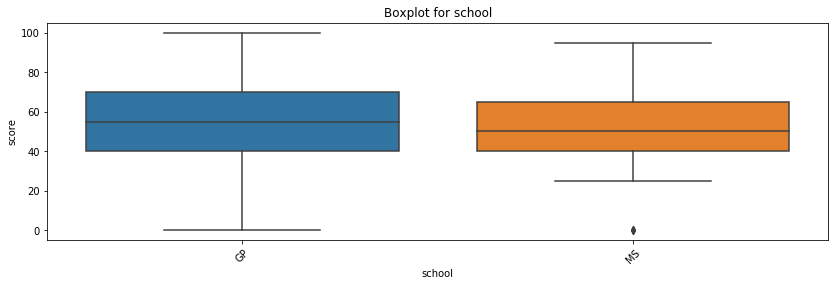

Pierson test: N score @ school = GP
Pierson test: Y score @ school = MS

Shapiro test: N score @ school = GP
Shapiro test: N score @ school = MS

Mann-Whitney test: Y score @ ('GP', 'MS') 0.113 0.05

===================================================sex===================================================

F 55.0
M 55.0


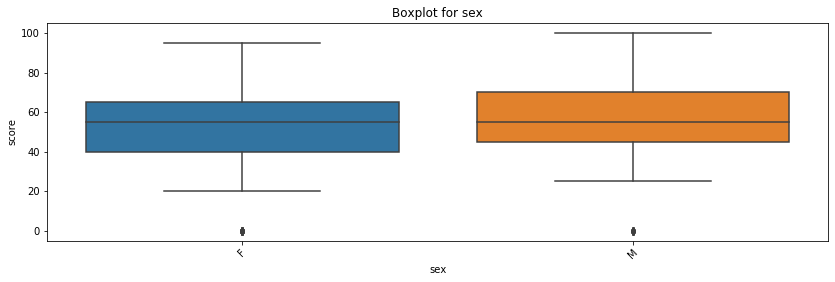

Pierson test: N score @ sex = F
Pierson test: N score @ sex = M

Shapiro test: N score @ sex = F
Shapiro test: N score @ sex = M

Mann-Whitney test: N score @ ('F', 'M') 0.025 0.05

===================================================address===================================================

U 55.0
nan nan
R 50.0


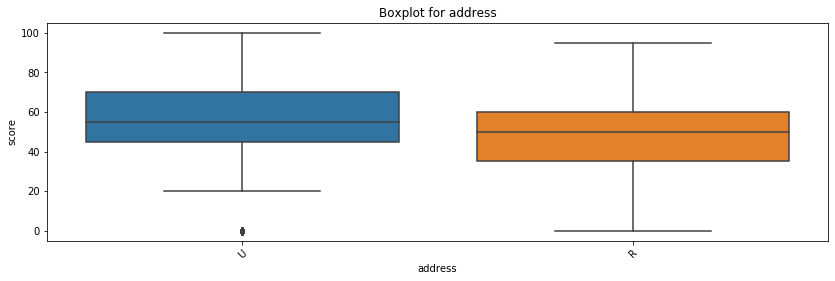

Pierson test: N score @ address = U
Pierson test: Y score @ address = R

Shapiro test: N score @ address = U
Shapiro test: N score @ address = R

Mann-Whitney test: N score @ ('U', 'R') 0.005 0.05

===================================================Pstatus===================================================

A 55.0
nan nan
T 55.0


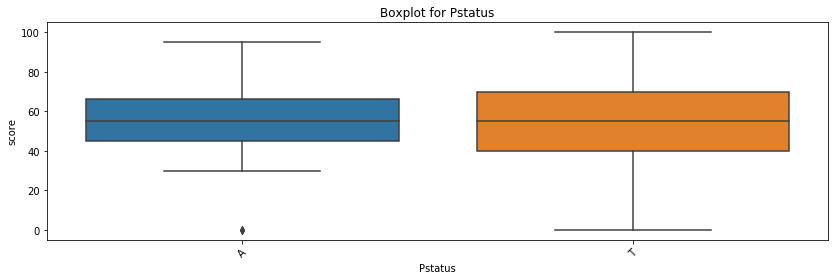

Pierson test: Y score @ Pstatus = A
Pierson test: N score @ Pstatus = T

Shapiro test: Y score @ Pstatus = A
Shapiro test: N score @ Pstatus = T

Mann-Whitney test: Y score @ ('T', 'A') 0.291 0.05

===================================================Mjob===================================================

at_home 50.0
health 65.0
other 55.0
services 55.0
teacher 55.0
nan nan


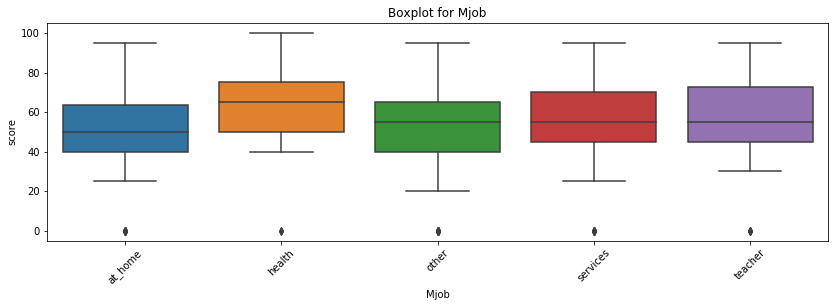

Pierson test: Y score @ Mjob = at_home
Pierson test: N score @ Mjob = health
Pierson test: N score @ Mjob = other
Pierson test: N score @ Mjob = services
Pierson test: Y score @ Mjob = teacher

Shapiro test: N score @ Mjob = at_home
Shapiro test: N score @ Mjob = health
Shapiro test: N score @ Mjob = other
Shapiro test: N score @ Mjob = services
Shapiro test: N score @ Mjob = teacher

Kruskal-Wallis test: N score @ Mjob 0.007 0.05

===================================================Fjob===================================================

teacher 70.0
other 55.0
nan nan
health 55.0
services 55.0
at_home 55.0


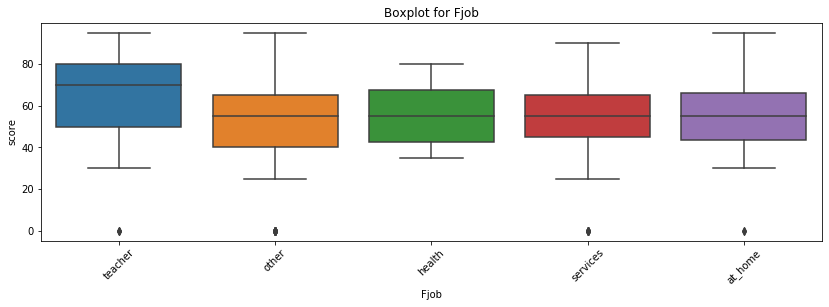

Pierson test: Y score @ Fjob = teacher
Pierson test: N score @ Fjob = other
Pierson test: Y score @ Fjob = health
Pierson test: N score @ Fjob = services
Pierson test: Y score @ Fjob = at_home

Shapiro test: N score @ Fjob = teacher
Shapiro test: N score @ Fjob = other
Shapiro test: Y score @ Fjob = health
Shapiro test: N score @ Fjob = services
Shapiro test: Y score @ Fjob = at_home

Kruskal-Wallis test: Y score @ Fjob 0.194 0.05

===================================================reason===================================================

course 50.0
other 55.0
home 55.0
reputation 55.0
nan nan


D:\anaconda_3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))
D:\anaconda_3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


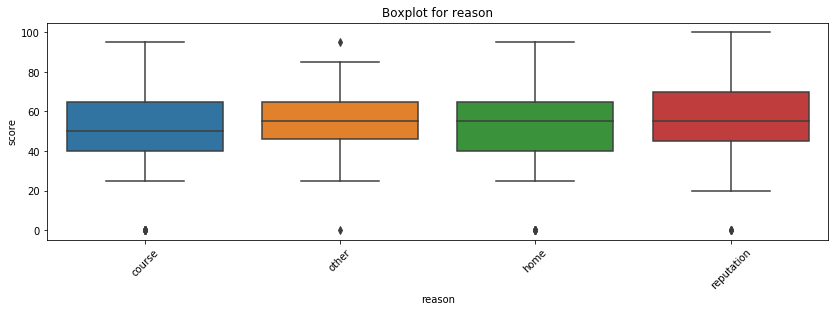

Pierson test: N score @ reason = course
Pierson test: Y score @ reason = other
Pierson test: N score @ reason = home
Pierson test: N score @ reason = reputation

Shapiro test: N score @ reason = course
Shapiro test: Y score @ reason = other
Shapiro test: N score @ reason = home
Shapiro test: N score @ reason = reputation

Kruskal-Wallis test: Y score @ reason 0.267 0.05

===================================================guardian===================================================

mother 55.0
father 55.0
other 50.0
nan nan


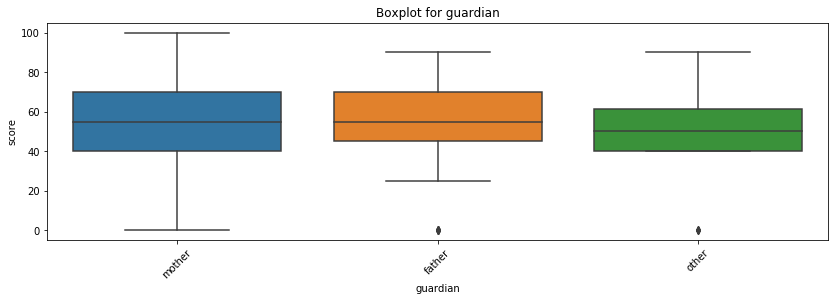

Pierson test: N score @ guardian = mother
Pierson test: N score @ guardian = father
Pierson test: Y score @ guardian = other

Shapiro test: N score @ guardian = mother
Shapiro test: N score @ guardian = father
Shapiro test: N score @ guardian = other

Kruskal-Wallis test: Y score @ guardian 0.291 0.05

===================================================schoolsup===================================================

yes 50.0
no 55.0
nan nan


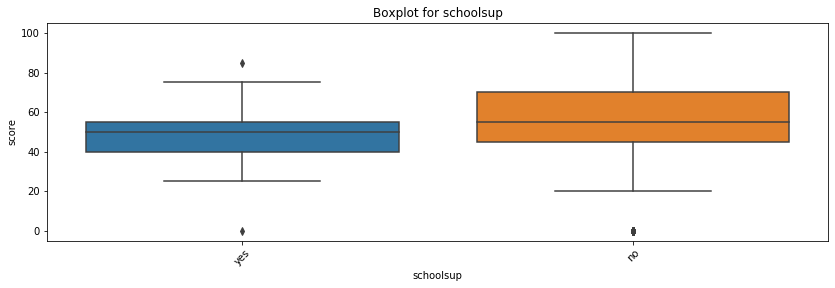

Pierson test: Y score @ schoolsup = yes
Pierson test: N score @ schoolsup = no

Shapiro test: Y score @ schoolsup = yes
Shapiro test: N score @ schoolsup = no

Mann-Whitney test: N score @ ('no', 'yes') 0.001 0.05

===================================================famsup===================================================

no 55.0
yes 55.0
nan nan


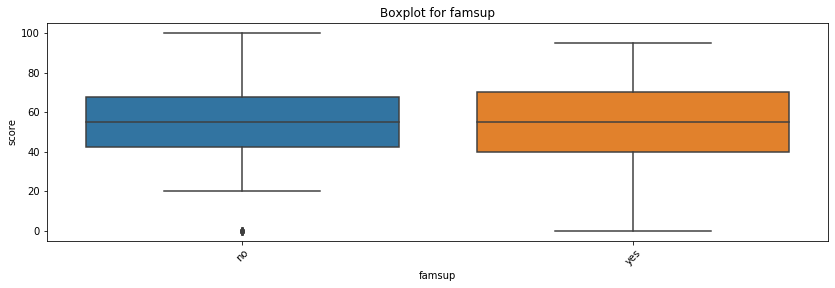

Pierson test: N score @ famsup = no
Pierson test: N score @ famsup = yes

Shapiro test: N score @ famsup = no
Shapiro test: N score @ famsup = yes

Mann-Whitney test: Y score @ ('yes', 'no') 0.357 0.05

===================================================paid===================================================

no 55.0
nan nan
yes 55.0


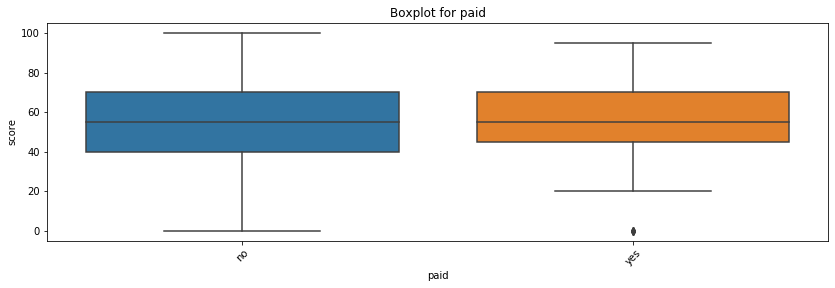

Pierson test: N score @ paid = no
Pierson test: N score @ paid = yes

Shapiro test: N score @ paid = no
Shapiro test: N score @ paid = yes

Mann-Whitney test: Y score @ ('no', 'yes') 0.131 0.05

===================================================activities===================================================

no 55.0
yes 55.0
nan nan


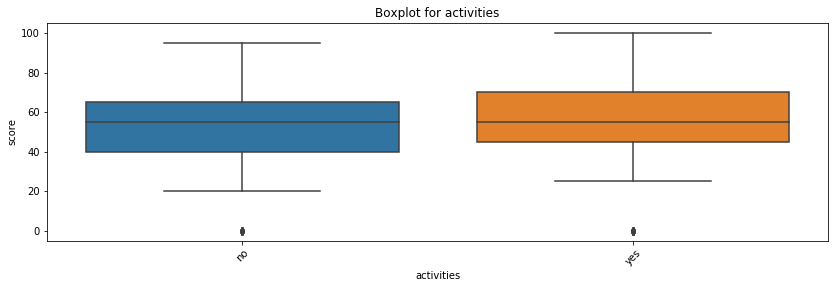

Pierson test: N score @ activities = no
Pierson test: N score @ activities = yes

Shapiro test: N score @ activities = no
Shapiro test: N score @ activities = yes

Mann-Whitney test: Y score @ ('yes', 'no') 0.324 0.05

===================================================nursery===================================================

yes 55.0
no 55.0
nan nan


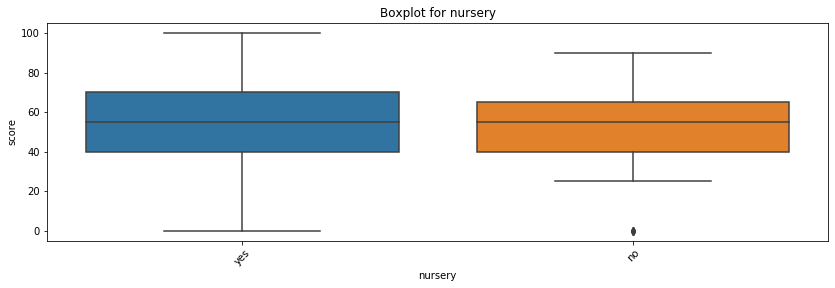

Pierson test: N score @ nursery = yes
Pierson test: N score @ nursery = no

Shapiro test: N score @ nursery = yes
Shapiro test: N score @ nursery = no

Mann-Whitney test: Y score @ ('yes', 'no') 0.253 0.05

===================================================higher===================================================

yes 55.0
nan nan
no 40.0


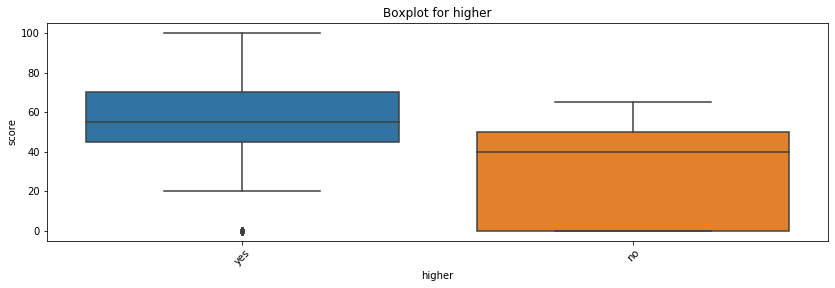

Pierson test: N score @ higher = yes
Pierson test: N score @ higher = no

Shapiro test: N score @ higher = yes
Shapiro test: N score @ higher = no

Mann-Whitney test: N score @ ('yes', 'no') 0.001 0.05

===================================================internet===================================================

nan nan
yes 55.0
no 50.0


D:\anaconda_3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


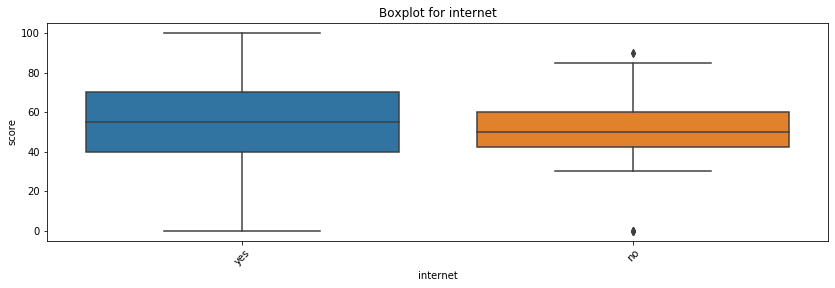

Pierson test: N score @ internet = yes
Pierson test: N score @ internet = no

Shapiro test: N score @ internet = yes
Shapiro test: N score @ internet = no

Mann-Whitney test: Y score @ ('yes', 'no') 0.093 0.05

===================================================romantic===================================================

no 55.0
nan nan
yes 55.0


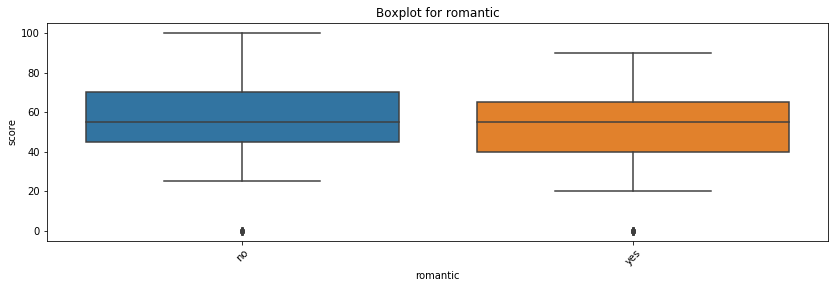

Pierson test: N score @ romantic = no
Pierson test: N score @ romantic = yes

Shapiro test: N score @ romantic = no
Shapiro test: N score @ romantic = yes

Mann-Whitney test: N score @ ('no', 'yes') 0.023 0.05

===================================================Результат анализа===================================================

Значимые различия найдены в колонках:
sex
address
Mjob
schoolsup
higher
romantic


In [42]:
kept_nominal_columns = []

for column in nominal_columns:
    print('\n'+'='*51 + column + '='*51+'\n')
    x = nominal_analysis(data_full, column, 'score')
    if not x:
        kept_nominal_columns.append(column)
print('\n'+'='*51 + 'Результат анализа' + '='*51+'\n')
print('Значимые различия найдены в колонках:', *kept_nominal_columns, sep='\n')

Проведённый анализ показывает, что параметры колонок **'sex', 'address', 'Mjob', 'schoolsup', 'higher', 'romantic'**. являются статистически значимыми. Обратив внимание на полученные $p-value$ для данных критериев, можно предположить, что изменив уровень значимости $\alpha$, часть колонок тест не пройдёт (**'sex', 'higher', 'romantic'**). Однако, во избежание ошибки второго рода я принимаю решение их оставить. Также, если судить по "бокс-плотам", данные в **'Fjob'** и **'guardian'** могут быть значимыми. Для этого преобразуем их и проведём данный анализ ещё раз.

**'Fjob'** - создадим новый столбец **'Fjob_teacher'**, в котором будет стоят число $1$, если отец обучающегося является преподавателем, и $0$, - в противном случае.


**'guardian'** - создадим новый столбец **'guardian_parents'**, в котором будет стоят число $1$, представителем ребёнка являются родители, и $0$, - в противном случае.

1.0 70.0
0.0 55.0
nan nan


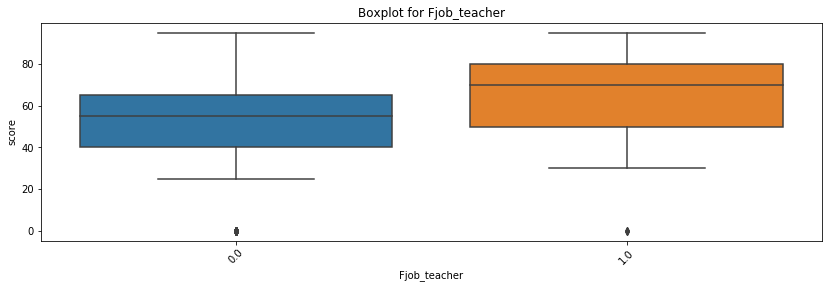

Pierson test: Y score @ Fjob_teacher = 1.0
Pierson test: N score @ Fjob_teacher = 0.0

Shapiro test: N score @ Fjob_teacher = 1.0
Shapiro test: N score @ Fjob_teacher = 0.0

Mann-Whitney test: N score @ (0.0, 1.0) 0.008 0.05


False

In [43]:
data['Fjob_teacher'] = data.Fjob.apply(
    lambda x: 1 if x == 'teacher' else x if pd.isna(x) else 0)
data_full['Fjob_teacher'] = data_full.Fjob.apply(
    lambda x: 1 if x == 'teacher' else x if pd.isna(x) else 0)
data_purified['Fjob_teacher'] = data_purified.Fjob.apply(
    lambda x: 1 if x == 'teacher' else x if pd.isna(x) else 0)

nominal_analysis(data_full, 'Fjob_teacher', 'score')

1.0 55.0
0.0 50.0
nan nan


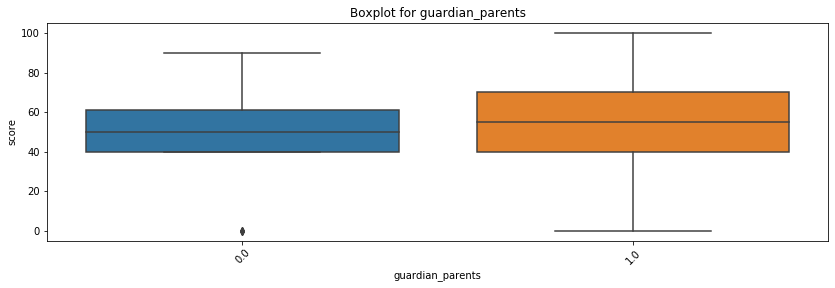

Pierson test: N score @ guardian_parents = 1.0
Pierson test: Y score @ guardian_parents = 0.0

Shapiro test: N score @ guardian_parents = 1.0
Shapiro test: N score @ guardian_parents = 0.0

Mann-Whitney test: Y score @ (1.0, 0.0) 0.064 0.05


True

In [44]:
data['guardian_parents'] = data.guardian.apply(
    lambda x: 1 if x in ['mother', 'father'] else x if pd.isna(x) else 0)
data_full['guardian_parents'] = data_full.guardian.apply(
    lambda x: 1 if x in ['mother', 'father'] else x if pd.isna(x) else 0)

nominal_analysis(data_full, 'guardian_parents', 'score')

Столбцы с опекунством и столбец с работой отца удалим, а "является ли отец учителем?" включим в необходимые.

In [45]:
kept_nominal_columns.append('Fjob_teacher')

# временно оставим, сократив в 10 пункте. Эти данные потребуются для определённых вычислений
kept_nominal_columns.append('Fjob')

## 9.2. Порядковые данные


===================================================famsize===================================================

nan nan
GT3 55.0
LE3 55.0


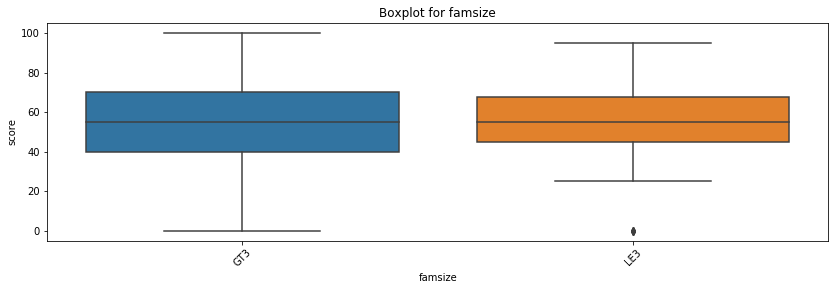

Pierson test: N score @ famsize = GT3
Pierson test: N score @ famsize = LE3

Shapiro test: N score @ famsize = GT3
Shapiro test: N score @ famsize = LE3

Mann-Whitney test: Y score @ ('GT3', 'LE3') 0.182 0.05

===================================================Medu===================================================

4.0 60.0
1.0 50.0
3.0 55.0
2.0 55.0
nan nan
0.0 75.0


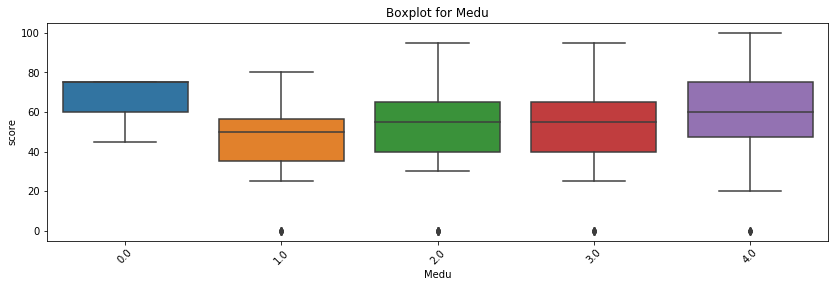

Pierson test: N score @ Medu = 4.0
Pierson test: N score @ Medu = 1.0
Pierson test: N score @ Medu = 3.0
Pierson test: N score @ Medu = 2.0
Pierson test could not be performed because of sample length, case: Medu = 0.0

Shapiro test: N score @ Medu = 4.0
Shapiro test: N score @ Medu = 1.0
Shapiro test: N score @ Medu = 3.0
Shapiro test: N score @ Medu = 2.0
Shapiro test: N score @ Medu = 0.0

Kruskal-Wallis test: N score @ Medu 0.0 0.05

===================================================Fedu===================================================

4.0 60.0
1.0 50.0
2.0 55.0
3.0 52.5
nan nan
0.0 65.0


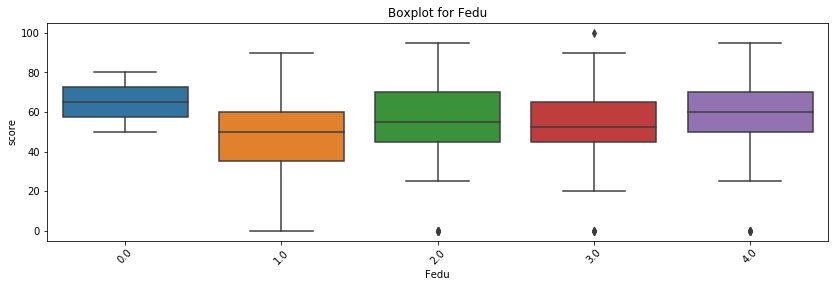

Pierson test: N score @ Fedu = 4.0
Pierson test: Y score @ Fedu = 1.0
Pierson test: N score @ Fedu = 2.0
Pierson test: N score @ Fedu = 3.0
Pierson test could not be performed because of sample length, case: Fedu = 0.0

Shapiro test: N score @ Fedu = 4.0
Shapiro test: N score @ Fedu = 1.0
Shapiro test: N score @ Fedu = 2.0
Shapiro test: N score @ Fedu = 3.0
Shapiro test could not be performed because of sample length, case: Fedu = 0.0

Kruskal-Wallis test: N score @ Fedu 0.029 0.05

===================================================studytime===================================================

2.0 55.0
3.0 60.0
1.0 50.0
nan nan
4.0 60.0


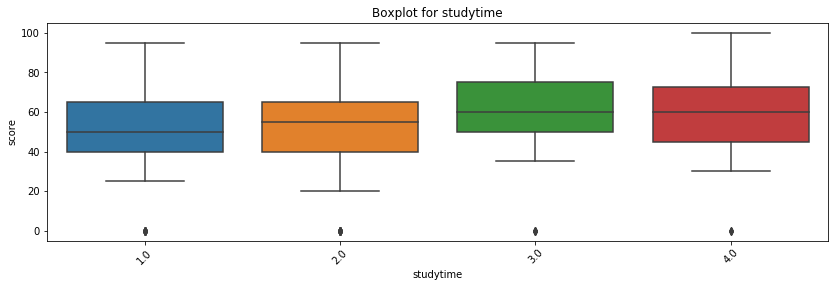

Pierson test: N score @ studytime = 2.0
Pierson test: N score @ studytime = 3.0
Pierson test: N score @ studytime = 1.0
Pierson test: Y score @ studytime = 4.0

Shapiro test: N score @ studytime = 2.0
Shapiro test: N score @ studytime = 3.0
Shapiro test: N score @ studytime = 1.0
Shapiro test: Y score @ studytime = 4.0

Kruskal-Wallis test: N score @ studytime 0.037 0.05

===================================================studytime, granular===================================================

-6.0 55.0
-9.0 60.0
-3.0 50.0
nan nan
-12.0 60.0


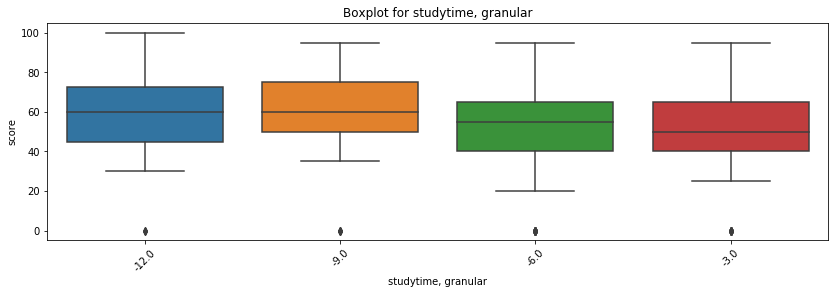

Pierson test: N score @ studytime, granular = -6.0
Pierson test: N score @ studytime, granular = -9.0
Pierson test: N score @ studytime, granular = -3.0
Pierson test: Y score @ studytime, granular = -12.0

Shapiro test: N score @ studytime, granular = -6.0
Shapiro test: N score @ studytime, granular = -9.0
Shapiro test: N score @ studytime, granular = -3.0
Shapiro test: Y score @ studytime, granular = -12.0

Kruskal-Wallis test: N score @ studytime, granular 0.037 0.05

===================================================famrel===================================================

4.0 52.5
5.0 55.0
3.0 55.0
nan nan
1.0 60.0
2.0 55.0


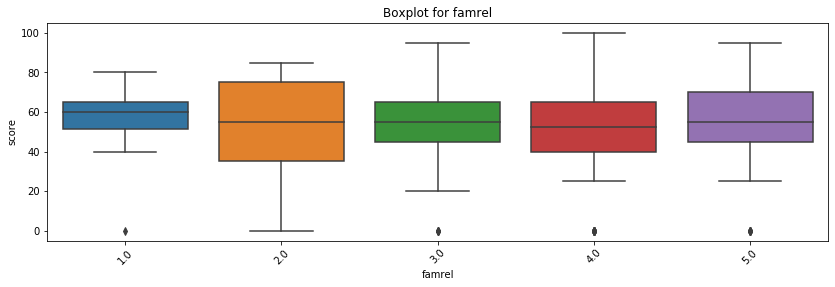

Pierson test: N score @ famrel = 4.0
Pierson test: N score @ famrel = 5.0
Pierson test: N score @ famrel = 3.0
Pierson test: N score @ famrel = 1.0
Pierson test: Y score @ famrel = 2.0

Shapiro test: N score @ famrel = 4.0
Shapiro test: N score @ famrel = 5.0
Shapiro test: N score @ famrel = 3.0
Shapiro test: Y score @ famrel = 1.0
Shapiro test: Y score @ famrel = 2.0

Kruskal-Wallis test: Y score @ famrel 0.545 0.05

===================================================freetime===================================================

3.0 50.0
2.0 60.0
4.0 55.0
1.0 50.0
5.0 60.0
nan nan


D:\anaconda_3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))
D:\anaconda_3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


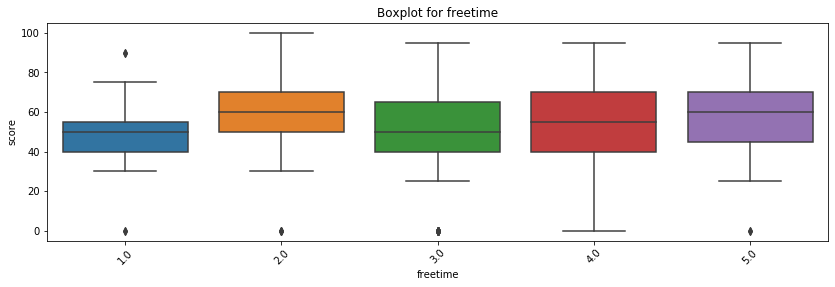

Pierson test: N score @ freetime = 3.0
Pierson test: N score @ freetime = 2.0
Pierson test: N score @ freetime = 4.0
Pierson test: Y score @ freetime = 1.0
Pierson test: Y score @ freetime = 5.0

Shapiro test: N score @ freetime = 3.0
Shapiro test: N score @ freetime = 2.0
Shapiro test: N score @ freetime = 4.0
Shapiro test: Y score @ freetime = 1.0
Shapiro test: Y score @ freetime = 5.0

Kruskal-Wallis test: Y score @ freetime 0.071 0.05

===================================================goout===================================================

4.0 50.0
3.0 55.0
2.0 60.0
1.0 55.0
5.0 50.0
nan nan


D:\anaconda_3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


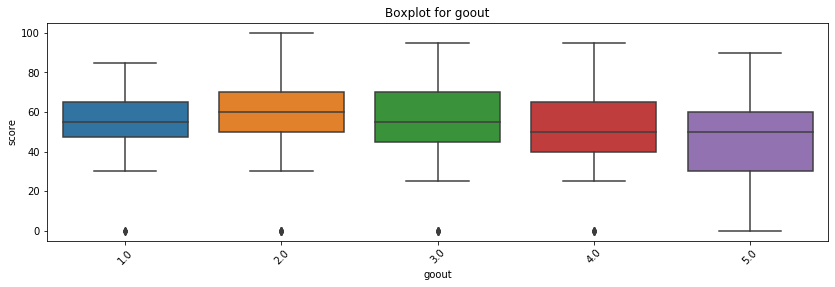

Pierson test: N score @ goout = 4.0
Pierson test: N score @ goout = 3.0
Pierson test: N score @ goout = 2.0
Pierson test: Y score @ goout = 1.0
Pierson test: Y score @ goout = 5.0

Shapiro test: N score @ goout = 4.0
Shapiro test: N score @ goout = 3.0
Shapiro test: N score @ goout = 2.0
Shapiro test: N score @ goout = 1.0
Shapiro test: N score @ goout = 5.0

Kruskal-Wallis test: N score @ goout 0.007 0.05

===================================================health===================================================

3.0 52.5
5.0 55.0
1.0 65.0
2.0 55.0
4.0 50.0
nan nan


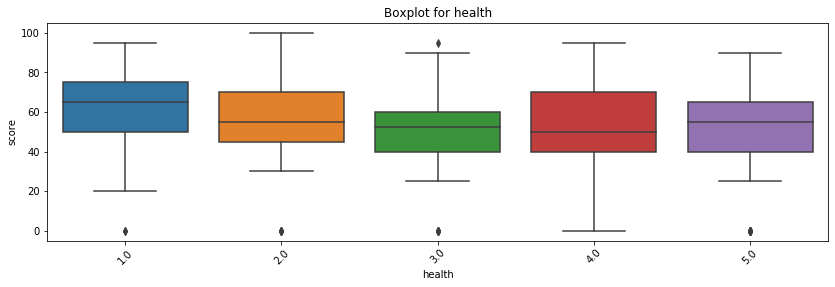

Pierson test: N score @ health = 3.0
Pierson test: N score @ health = 5.0
Pierson test: N score @ health = 1.0
Pierson test: Y score @ health = 2.0
Pierson test: Y score @ health = 4.0

Shapiro test: N score @ health = 3.0
Shapiro test: N score @ health = 5.0
Shapiro test: N score @ health = 1.0
Shapiro test: N score @ health = 2.0
Shapiro test: N score @ health = 4.0

Kruskal-Wallis test: Y score @ health 0.173 0.05

===================================================traveltime===================================================

2.0 50.0
1.0 55.0
3.0 50.0
nan nan
4.0 50.0


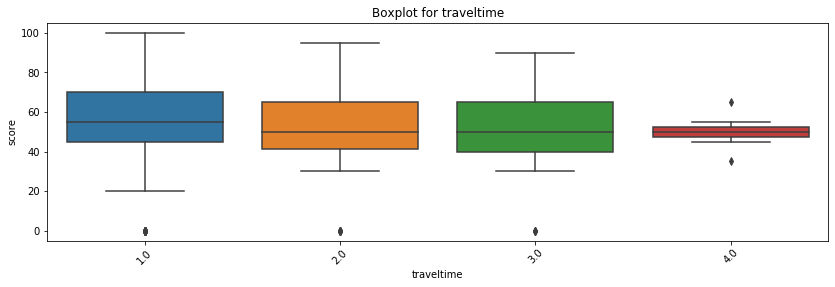

Pierson test: N score @ traveltime = 2.0
Pierson test: N score @ traveltime = 1.0
Pierson test: Y score @ traveltime = 3.0
Pierson test could not be performed because of sample length, case: traveltime = 4.0

Shapiro test: N score @ traveltime = 2.0
Shapiro test: N score @ traveltime = 1.0
Shapiro test: N score @ traveltime = 3.0
Shapiro test: Y score @ traveltime = 4.0

Kruskal-Wallis test: Y score @ traveltime 0.483 0.05

===================================================Результат анализа===================================================

Значимые различия найдены в колонках:
Medu
Fedu
studytime
studytime, granular
goout


In [46]:
kept_order_columns = []

for column in order_columns:
    print('\n'+'='*51 + column + '='*51+'\n')
    x = nominal_analysis(data_full, column, 'score')
    if not x:
        kept_order_columns.append(column)
print('\n'+'='*51 + 'Результат анализа' + '='*51+'\n')
print('Значимые различия найдены в колонках:', *kept_order_columns, sep='\n')

Проведённый анализ показывает, что параметры колонок **'Medu', 'Fedu', 'studytime', 'studytime, granular', 'goout', 'romantic'**. являются статистически значимыми. Обратив внимание на полученные $p-value$ для данных критериев, можно предположить, что изменив уровень значимости $\alpha$, часть колонок тест не пройдёт (**'Fedu', 'studytime', 'studytime, granular', 'goout'**). Однако, во избежание ошибки второго рода я принимаю решение их оставить.

## 9.3. Разбор колонки без описания 'studytime, granular'

Так как стобцы 'studytime, granular' и 'studytime' имеют близкие названия, то между ними логично предположить наличие какой-либо связи.

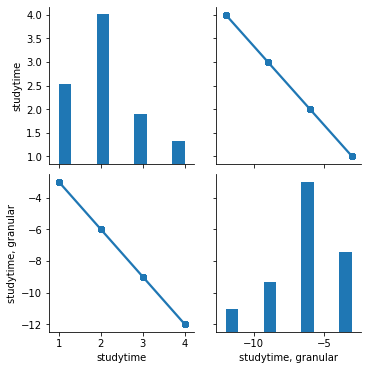

In [47]:
sns.pairplot(data[['studytime', 'studytime, granular']], kind='reg')

Судя по графику очевидна линейная зависимость: $"studytime" = -3 \cdot "studytime, granular"$. Так как последний не имеет какой-либо адекватной интерпритации по условию задачи, то удалим именно его. Перед этим проверим, а возможно ли с его помощью восстановить пропуски в первом.

In [48]:
display(data[data.studytime.isna()])

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score,Fjob_teacher,guardian_parents
17,GP,F,16,U,GT3,T,3.0,3.0,other,NaN,reputation,mother,3.0,NaN,0.0,yes,NaN,no,yes,yes,NaN,yes,no,no,5.0,3.0,2.0,4.0,4.0,50.0,NaN,1.0
91,GP,F,15,U,GT3,T,4.0,3.0,services,other,reputation,mother,1.0,NaN,0.0,no,no,yes,yes,yes,NaN,yes,yes,no,4.0,5.0,5.0,1.0,4.0,90.0,0.0,1.0
112,GP,F,16,U,GT3,NaN,2.0,2.0,at_home,other,NaN,mother,NaN,NaN,1.0,yes,no,no,yes,yes,NaN,yes,yes,NaN,3.0,1.0,2.0,5.0,6.0,65.0,0.0,1.0
266,GP,M,17,U,GT3,NaN,3.0,1.0,services,NaN,other,mother,1.0,NaN,0.0,no,no,yes,yes,yes,NaN,yes,yes,NaN,5.0,4.0,4.0,NaN,2.0,50.0,NaN,1.0
314,GP,F,19,U,GT3,T,1.0,1.0,at_home,health,home,other,1.0,NaN,2.0,no,no,no,no,no,NaN,yes,yes,yes,4.0,NaN,2.0,3.0,14.0,65.0,0.0,0.0


К сожалению, восстановить одни значения по другим, используя полученную прямую пропорциональность нельзя. Более того, в этих строках так много пропусков, что проще будет не восстанавливать их, а удалить.

In [49]:
data = data[data.studytime.notna()]
kept_order_columns.remove('studytime, granular')

data_purified = data_purified[data_purified.studytime.notna()]

In [50]:
kept_columns = []
kept_columns.extend(numerical_columns)
kept_columns.extend(kept_nominal_columns)
kept_columns.extend(kept_order_columns)

data = data[kept_columns]
data_purified = data_purified[kept_columns]

## 10. Удаление и заполнение пустых ячеек

In [51]:
longest_column_name = max(data.columns, key=lambda word: len(word))
len_longest_column = len(longest_column_name)

len_data = len(data)
print('Всего в таблце строк:\t', len_data, '\n')

for column_name in data.columns:
    n_na_cells = len(data[data[column_name].isna()])

    if n_na_cells != 0 or n_empty_cells != 0:
        percent_na_cells = int(round((n_na_cells / len_data)*100, 0))
        print('В столбце\t', column_name+' '*(len_longest_column-len(column_name)), '\t',
              n_na_cells, '\t', percent_na_cells, '%\tсодержащих Nan.')

Всего в таблце строк:	 352 

В столбце	 address      	 13 	 4 %	содержащих Nan.
В столбце	 Mjob         	 16 	 5 %	содержащих Nan.
В столбце	 schoolsup    	 8 	 2 %	содержащих Nan.
В столбце	 higher       	 17 	 5 %	содержащих Nan.
В столбце	 romantic     	 28 	 8 %	содержащих Nan.
В столбце	 Fjob_teacher 	 32 	 9 %	содержащих Nan.
В столбце	 Fjob         	 32 	 9 %	содержащих Nan.
В столбце	 Medu         	 3 	 1 %	содержащих Nan.
В столбце	 Fedu         	 23 	 7 %	содержащих Nan.
В столбце	 goout        	 7 	 2 %	содержащих Nan.


Удаление всех строк (в соответствии со стратегией ) приведёт к сокращению датаседа до $58\%$ от размеров исходного, что на по моему мнению, не является хорошим вариантом. К сожалению, нам не известен формат проведения опроса, а потому качественных гипотез о методах восстановления или замещания пустующих значений я сделать сейчас не могу. Каждый столбец, содержащий пустующие ячейки, рассмотрим отдельно. Данные постараяемся восстановить, сохраняя распределение признаков или порционность. 

### 10.1. Medu (уровень образования матери)

Рассмотрим связь столбцов **'Medu'** и **'Mjob'**. Если получится, то восстановим одни значения по другим. Для этого воспользуемся исходными данными, а не сокращенными, сохраняющимися в датасете data_full.

Удаление всех строк, в которых хотя бы одно значение пропущено, не кажется лучшим вариантов решения данного вопроса, так как 

In [52]:
display(data_full[data_full.Medu.isna()][['Mjob', 'Medu']])

,Mjob,Medu
92,other,NaN
193,services,NaN
239,other,NaN


На три неизвестных значения приходится всего два вида "работ". Для каждого вида занятости предположим нормальность распределения уровня образования (нулевая гипотеза). Если гипотеза будет отвергнута, то удалим сии строки.

In [53]:
print(data[data.Mjob == 'other']['Medu'].value_counts())
print(data[data.Mjob == 'services']['Medu'].value_counts())

2.0    40
3.0    31
1.0    21
4.0    21
0.0     1
Name: Medu, dtype: int64
3.0    33
2.0    26
4.0    19
1.0     5
Name: Medu, dtype: int64


Для случая, когда мать работает в иных работах, необходимо применить поправку Йетса, однако в таком случае число величин сократится до 4-х, что сделает невозможным адекватный анализ на тестирование гипотезы о каком-либо распределении. Для матерей, занятых в сфере услуг, также невозможно совершить подобный анализ. Таким образом, строки просто удалим.

In [54]:
data = data[data.Medu.notna()]
data_purified = data_purified[data_purified.Medu.notna()]

Также уберём все случаи, когда мать не имеет образования, так как таких случаев всего 3, что мало.

In [55]:
data = data[data.Medu != 0]
data_purified = data_purified[data_purified.Medu != 0]

### 10.2. goout (проведение времени с друзьями)

In [56]:
data[data.goout.isna()]

,age,absences,score,failures,sex,address,Mjob,schoolsup,higher,romantic,Fjob_teacher,Fjob,Medu,Fedu,studytime,goout
89,16,18.0,35.0,0.0,M,U,teacher,no,yes,no,0.0,health,4.0,4.0,2.0,NaN
200,16,2.0,80.0,0.0,F,U,health,no,yes,no,0.0,other,4.0,3.0,2.0,NaN
202,17,4.0,50.0,0.0,F,U,other,no,yes,no,0.0,other,1.0,1.0,2.0,NaN
221,17,0.0,0.0,1.0,F,U,at_home,no,yes,yes,0.0,other,1.0,1.0,3.0,NaN
241,17,2.0,60.0,0.0,M,NaN,teacher,no,yes,no,0.0,other,4.0,4.0,2.0,NaN
322,17,3.0,55.0,0.0,F,R,services,no,yes,no,0.0,services,2.0,2.0,3.0,NaN


Есть ли связь с другим времяпрепровождением? 

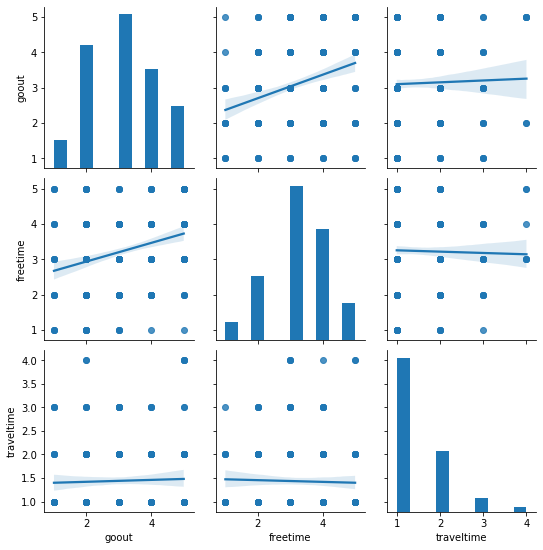

In [57]:
sns.pairplot(data_full[['goout', 'freetime', 'traveltime']], kind='reg')

Однозначных зависимостей не обнаружено, хотя прямая пропорциональность между свободным временем и временем с друзьями есть :( Быть может эта величина нормально распределена?

In [58]:
norm_test_Pirson_nominative(data, 'goout')
norm_test_Shapiro_nominative(data, 'goout')

Pierson test: N goout 0.0 0.05
Shapiro test: N goout 2.768034850200089e-16 0.05


В связи с этим, просто удалим строки с пропусками.

In [59]:
data = data[data.goout.notna()]
data_purified = data_purified[data_purified.goout.notna()]

### 10.3. schoolsup (дополнительная образовательная поддержка)

Данные строки можно было бы просто удалить, однако мы попробуем пойти иным путём и псевдовосстановим данные, ориентируясь на сохранение пропорции имеющих дополнительную образовательную поддержку, и не имеющих онную.

In [60]:
data[data.schoolsup.isna()]

,age,absences,score,failures,sex,address,Mjob,schoolsup,higher,romantic,Fjob_teacher,Fjob,Medu,Fedu,studytime,goout
27,15,4.0,75.0,0.0,M,U,health,NaN,yes,NaN,0.0,services,4.0,2.0,1.0,4.0
35,15,0.0,30.0,0.0,F,U,other,NaN,yes,no,0.0,other,2.0,3.0,1.0,1.0
79,16,12.0,25.0,0.0,F,U,at_home,NaN,yes,no,0.0,other,3.0,4.0,2.0,3.0
151,16,6.0,70.0,1.0,M,U,at_home,NaN,yes,yes,NaN,NaN,2.0,1.0,1.0,4.0
211,17,13.0,65.0,0.0,M,U,services,NaN,yes,yes,0.0,other,4.0,4.0,2.0,5.0
274,17,2.0,50.0,0.0,F,U,at_home,NaN,yes,yes,0.0,health,2.0,4.0,2.0,3.0
321,17,12.0,45.0,0.0,F,U,other,NaN,yes,yes,0.0,other,2.0,2.0,2.0,2.0
394,19,5.0,45.0,0.0,M,U,other,NaN,yes,no,0.0,at_home,1.0,1.0,1.0,3.0


In [61]:
data_purified = data_purified[data_purified.schoolsup.notna()]


weights = data.schoolsup.value_counts().to_dict()
data['schoolsup'] = data['schoolsup'].apply(
    lambda x: x if not pd.isna(x) else weighted_random(weights))

### 10.4. address (тип адреса ученика)

Посмотрим все столбцы. Быть может это натолкнёт нас на некоторые мысли.

In [62]:
data_full[data_full.address.isna()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score,Fjob_teacher,guardian_parents
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0,0.0,1.0
52,GP,M,15,NaN,LE3,A,4.0,2.0,health,NaN,other,father,2.0,1.0,1.0,no,NaN,no,no,yes,-3.0,yes,NaN,no,5.0,5.0,5.0,5.0,6.0,50.0,NaN,1.0
75,GP,M,15,NaN,GT3,T,4.0,3.0,teacher,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,NaN,NaN,3.0,3.0,5.0,6.0,50.0,0.0,1.0
92,GP,F,16,NaN,LE3,T,NaN,1.0,other,other,home,father,1.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,3.0,3.0,NaN,2.0,4.0,30.0,0.0,1.0
96,GP,M,16,NaN,GT3,NaN,4.0,3.0,services,other,reputation,mother,2.0,1.0,0.0,yes,yes,NaN,yes,no,-3.0,NaN,yes,no,3.0,3.0,3.0,4.0,2.0,75.0,0.0,1.0
159,GP,M,16,NaN,GT3,T,3.0,NaN,other,services,course,father,1.0,2.0,1.0,no,yes,yes,no,yes,-6.0,yes,yes,yes,4.0,5.0,5.0,5.0,4.0,60.0,0.0,1.0
168,GP,F,16,NaN,GT3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,no,-6.0,yes,yes,no,5.0,1.0,5.0,4.0,0.0,0.0,0.0,1.0
241,GP,M,17,NaN,LE3,A,4.0,4.0,teacher,other,course,mother,NaN,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,3.0,3.0,NaN,4.0,2.0,60.0,0.0,1.0
254,GP,M,17,NaN,NaN,T,2.0,1.0,other,other,course,mother,1.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,4.0,4.0,2.0,5.0,NaN,60.0,0.0,1.0
292,GP,F,18,NaN,LE3,T,2.0,1.0,services,at_home,reputation,mother,1.0,2.0,1.0,no,NaN,no,no,yes,-6.0,yes,yes,yes,5.0,4.0,3.0,5.0,12.0,65.0,0.0,1.0


Практически все значения в столбце **'traveltime'** принадлежат множеству $\{1,2\}$. По данным в табличке примерно $87\%$ из тех, кто добирается до места учёбы меньше, чем за $15$ минут, живут в городе. Аналогично, $70\%$ из тех, кому требуется от $15$ минут до $30$, проживают в городе. Также, у многих в анкете причиной выбора школы указана близость к месту жительства. Поэтому всем, кому требуется меньше получаса мы проставим $U$. В таком случае ошибка не будет очень большой.

Лишь одной девушке требуется $30-60$ минут, чтобы добраться до места учёбы. Её строку мы можем как и удалить, так и поставить какое-либо значение. Так как она единственная дочь в семье, она планирует получать высшее образование, у них хорошие отношения в семье и при этому у неё достаточно крепкое здоровье, а также много дополнительного времени на учёбу дома, то можно предположить, что она также живёт в городе.

In [63]:
data_purified = data_purified[data_purified.address.notna()]
data.address = data.address.apply(lambda x: 'U' if x is np.nan else x)

### 10.5. Mjob (место работы матери)

In [64]:
display(data[data.Mjob.isna()])

,age,absences,score,failures,sex,address,Mjob,schoolsup,higher,romantic,Fjob_teacher,Fjob,Medu,Fedu,studytime,goout
29,16,16.0,55.0,0.0,M,U,NaN,no,yes,yes,1.0,teacher,4.0,4.0,2.0,5.0
54,15,6.0,65.0,0.0,F,U,NaN,no,yes,NaN,0.0,other,3.0,3.0,1.0,4.0
59,16,2.0,80.0,0.0,F,U,NaN,no,yes,no,NaN,NaN,4.0,2.0,2.0,3.0
88,16,12.0,50.0,1.0,M,U,NaN,no,yes,no,0.0,other,2.0,2.0,2.0,2.0
104,15,0.0,90.0,0.0,M,U,NaN,no,yes,no,0.0,other,3.0,4.0,2.0,4.0
128,18,0.0,0.0,2.0,M,R,NaN,no,yes,no,0.0,other,2.0,2.0,1.0,3.0
145,15,0.0,55.0,0.0,F,U,NaN,no,yes,no,0.0,services,1.0,1.0,2.0,2.0
156,17,8.0,65.0,0.0,M,R,NaN,no,yes,no,0.0,other,1.0,2.0,1.0,2.0
166,16,4.0,50.0,0.0,M,U,NaN,no,no,no,0.0,other,2.0,2.0,2.0,5.0
174,16,4.0,45.0,0.0,F,U,NaN,no,yes,no,0.0,other,3.0,3.0,2.0,5.0


In [65]:
data_full.pivot_table(values='score', index='Mjob',
                      columns='Medu', aggfunc='count')

Medu,0.0,1.0,2.0,3.0,4.0
Mjob,,,,,
at_home,2.0,25.0,21.0,8.0,2.0
health,NaN,1.0,2.0,5.0,24.0
other,1.0,23.0,43.0,36.0,22.0
services,NaN,5.0,30.0,38.0,24.0
teacher,NaN,NaN,NaN,3.0,52.0


В соответствии с построенной таблицей расставим профессию матери, сохранив частотность. Но, как и ранее, расставляя значения, сохраним данные строки в "подозрительные".

In [66]:
data_purified = data_purified[data_purified.Mjob.notna()]

for Medu_ind in range(5):
    weights = data[data.Medu == Medu_ind]['Mjob'].value_counts().to_dict()
    data.loc[data.Medu == Medu_ind, 'Mjob'] = data.loc[data.Medu == Medu_ind,
                                                       'Mjob'].apply(lambda x: x if not pd.isna(x) else weighted_random(weights))

### 10.6. higher (наличие желания получение высшего образования)

In [67]:
data[data.higher.isna()]

,age,absences,score,failures,sex,address,Mjob,schoolsup,higher,romantic,Fjob_teacher,Fjob,Medu,Fedu,studytime,goout
34,16,0.0,75.0,0.0,M,U,other,no,NaN,no,0.0,other,3.0,2.0,1.0,3.0
48,15,2.0,70.0,0.0,M,U,teacher,no,NaN,no,0.0,other,4.0,2.0,2.0,3.0
76,15,8.0,50.0,0.0,M,U,teacher,no,NaN,no,0.0,other,4.0,0.0,4.0,3.0
84,15,2.0,50.0,0.0,F,U,other,no,NaN,no,0.0,other,1.0,1.0,2.0,2.0
96,16,2.0,75.0,0.0,M,U,services,yes,NaN,no,0.0,other,4.0,3.0,1.0,3.0
142,15,2.0,55.0,0.0,F,U,teacher,no,NaN,no,0.0,services,4.0,NaN,3.0,2.0
149,15,0.0,50.0,3.0,M,U,services,no,NaN,no,0.0,other,2.0,1.0,1.0,5.0
158,16,2.0,75.0,0.0,M,R,at_home,no,NaN,no,0.0,other,2.0,2.0,1.0,2.0
170,16,0.0,0.0,0.0,M,U,other,no,NaN,no,0.0,other,3.0,4.0,1.0,5.0
171,16,2.0,80.0,0.0,M,U,other,no,NaN,yes,0.0,other,1.0,0.0,2.0,2.0


Так как причины отсутствия ответа нам неизвестны, восстановим сохранив пропорциональность. Отмечу, что это практически совпадёт со стратегией, если бы заменяли бы на самый частый вариант.

In [68]:
data_purified = data_purified[data_purified.higher.notna()]

weights = data.higher.value_counts().to_dict()
data['higher'] = data['higher'].apply(
    lambda x: x if not pd.isna(x) else weighted_random(weights))

### 10.6. Fedu (уровень образования отца)

Восстановим значения, используя тот же метод, что и в случае **'Mjob'**.

In [69]:
data_full.pivot_table(values='score', index='Fjob',
                      columns='Fedu', aggfunc='count')

Fedu,0.0,1.0,2.0,3.0,4.0
Fjob,,,,,
at_home,NaN,3.0,6.0,3.0,2.0
health,NaN,1.0,1.0,3.0,8.0
other,2.0,46.0,58.0,50.0,31.0
services,NaN,18.0,26.0,30.0,17.0
teacher,NaN,NaN,NaN,1.0,25.0


In [70]:
data_purified = data_purified[data_purified.Fedu.notna()]

for job in data_full.Fjob.unique():
    weights = data_full[data_full.Fjob == job]['Fedu'].value_counts().to_dict()
    data.loc[data.Fjob == job, 'Fedu'] = data.loc[data.Fjob == job, 'Fedu'].apply(
        lambda x: x if not pd.isna(x) else weighted_random(weights))

### 10.7. Fjob_teacher (является ли отец учителем?)

In [71]:
data[data.Fjob_teacher.isna()]

,age,absences,score,failures,sex,address,Mjob,schoolsup,higher,romantic,Fjob_teacher,Fjob,Medu,Fedu,studytime,goout
3,15,2.0,75.0,0.0,F,U,health,no,yes,yes,NaN,NaN,4.0,2.0,3.0,2.0
22,16,2.0,80.0,0.0,M,U,teacher,no,yes,no,NaN,NaN,4.0,2.0,2.0,1.0
26,15,2.0,55.0,0.0,M,U,other,no,yes,NaN,NaN,NaN,2.0,2.0,1.0,2.0
31,15,0.0,85.0,0.0,M,U,services,no,yes,no,NaN,NaN,4.0,4.0,2.0,1.0
44,16,14.0,45.0,1.0,F,U,other,yes,yes,no,NaN,NaN,2.0,2.0,2.0,3.0
47,16,4.0,100.0,0.0,M,U,health,no,yes,no,NaN,NaN,4.0,3.0,4.0,2.0
52,15,6.0,50.0,1.0,M,U,health,no,yes,no,NaN,NaN,4.0,2.0,1.0,5.0
59,16,2.0,80.0,0.0,F,U,services,no,yes,no,NaN,NaN,4.0,2.0,2.0,3.0
68,15,2.0,40.0,0.0,F,R,health,yes,yes,no,NaN,NaN,2.0,2.0,2.0,3.0
107,16,2.0,90.0,0.0,M,U,services,no,yes,no,NaN,NaN,3.0,3.0,3.0,3.0


Учительской профессией заняты только люди, владеющие высшим образованием, согласно таблице. Поэтому все, кто имеют высшее образования получат 0 и 1 в соответствии с частотами из сводной таблицы, а с уровнем образования ниже - 0. Строки, где неизвестно ни уровня образования, ни профессии, будут удалены.

In [72]:
data = data[(data.Fedu.notna()) | (data.Fjob.notna())]
data_purified = data_purified[(data_purified.Fedu.notna()) |
                              (data_purified.Fjob.notna())]
data_purified = data_purified[data_purified.Fjob_teacher.notna()]

weights_temp = data_full[data_full.Fedu == 4]['Fjob'].value_counts().to_dict()
weights = {1: 0, 0: 0}
for k, v in weights_temp.items():
    if k == 'teacher':
        weights.update({1: v})
    else:
        weights.update({0: weights[0]+v})

data.loc[data.Fedu == 4, 'Fjob_teacher'] = data.loc[data.Fedu == 4, 'Fjob_teacher'].apply(
    lambda x: x if not pd.isna(x) else weighted_random(weights))
data.loc[data.Fedu != 4, 'Fjob_teacher'] = data.loc[data.Fedu != 4, 'Fjob_teacher'].apply(
    lambda x: x if not pd.isna(x) else 0)

data = data.drop('Fjob', axis=1)
data_purified = data_purified.drop('Fjob', axis=1)

### 10.8. romantic (состоит ли в отношениях?)

Романтические отношения свойственны старшим школьникам и потому личная жизнь сильно зависит от школьников. Восстановим пропущенные данные, ориентируясь на сохранение частотности сообразно возрасту.

In [73]:
data_full.pivot_table(values='score', index='age',
                      columns='romantic', aggfunc='count')

romantic,no,yes
age,,
15,53.0,18.0
16,69.0,27.0
17,58.0,34.0
18,42.0,32.0
19,10.0,10.0
20,2.0,1.0
21,1.0,NaN
22,NaN,1.0


In [74]:
data_purified = data_purified[data_purified.romantic.notna()]

for age in data_full.age.unique():
    weights = data_full[data_full.age ==
                        age]['romantic'].value_counts().to_dict()
    data.loc[data.age == age, 'romantic'] = data.loc[data.age == age, 'romantic'].apply(
        lambda x: x if not pd.isna(x) else weighted_random(weights))

In [75]:
print('Отношение очищенных данных к восстановленным в процентах:',
      round(len(data_purified)/len(data)*100, 1))

Отношение очищенных данных к восстановленным в процентах: 64.5


## 11. Предфинальный анализ

Оценим корреляции на восстановленых и очищенных данных.

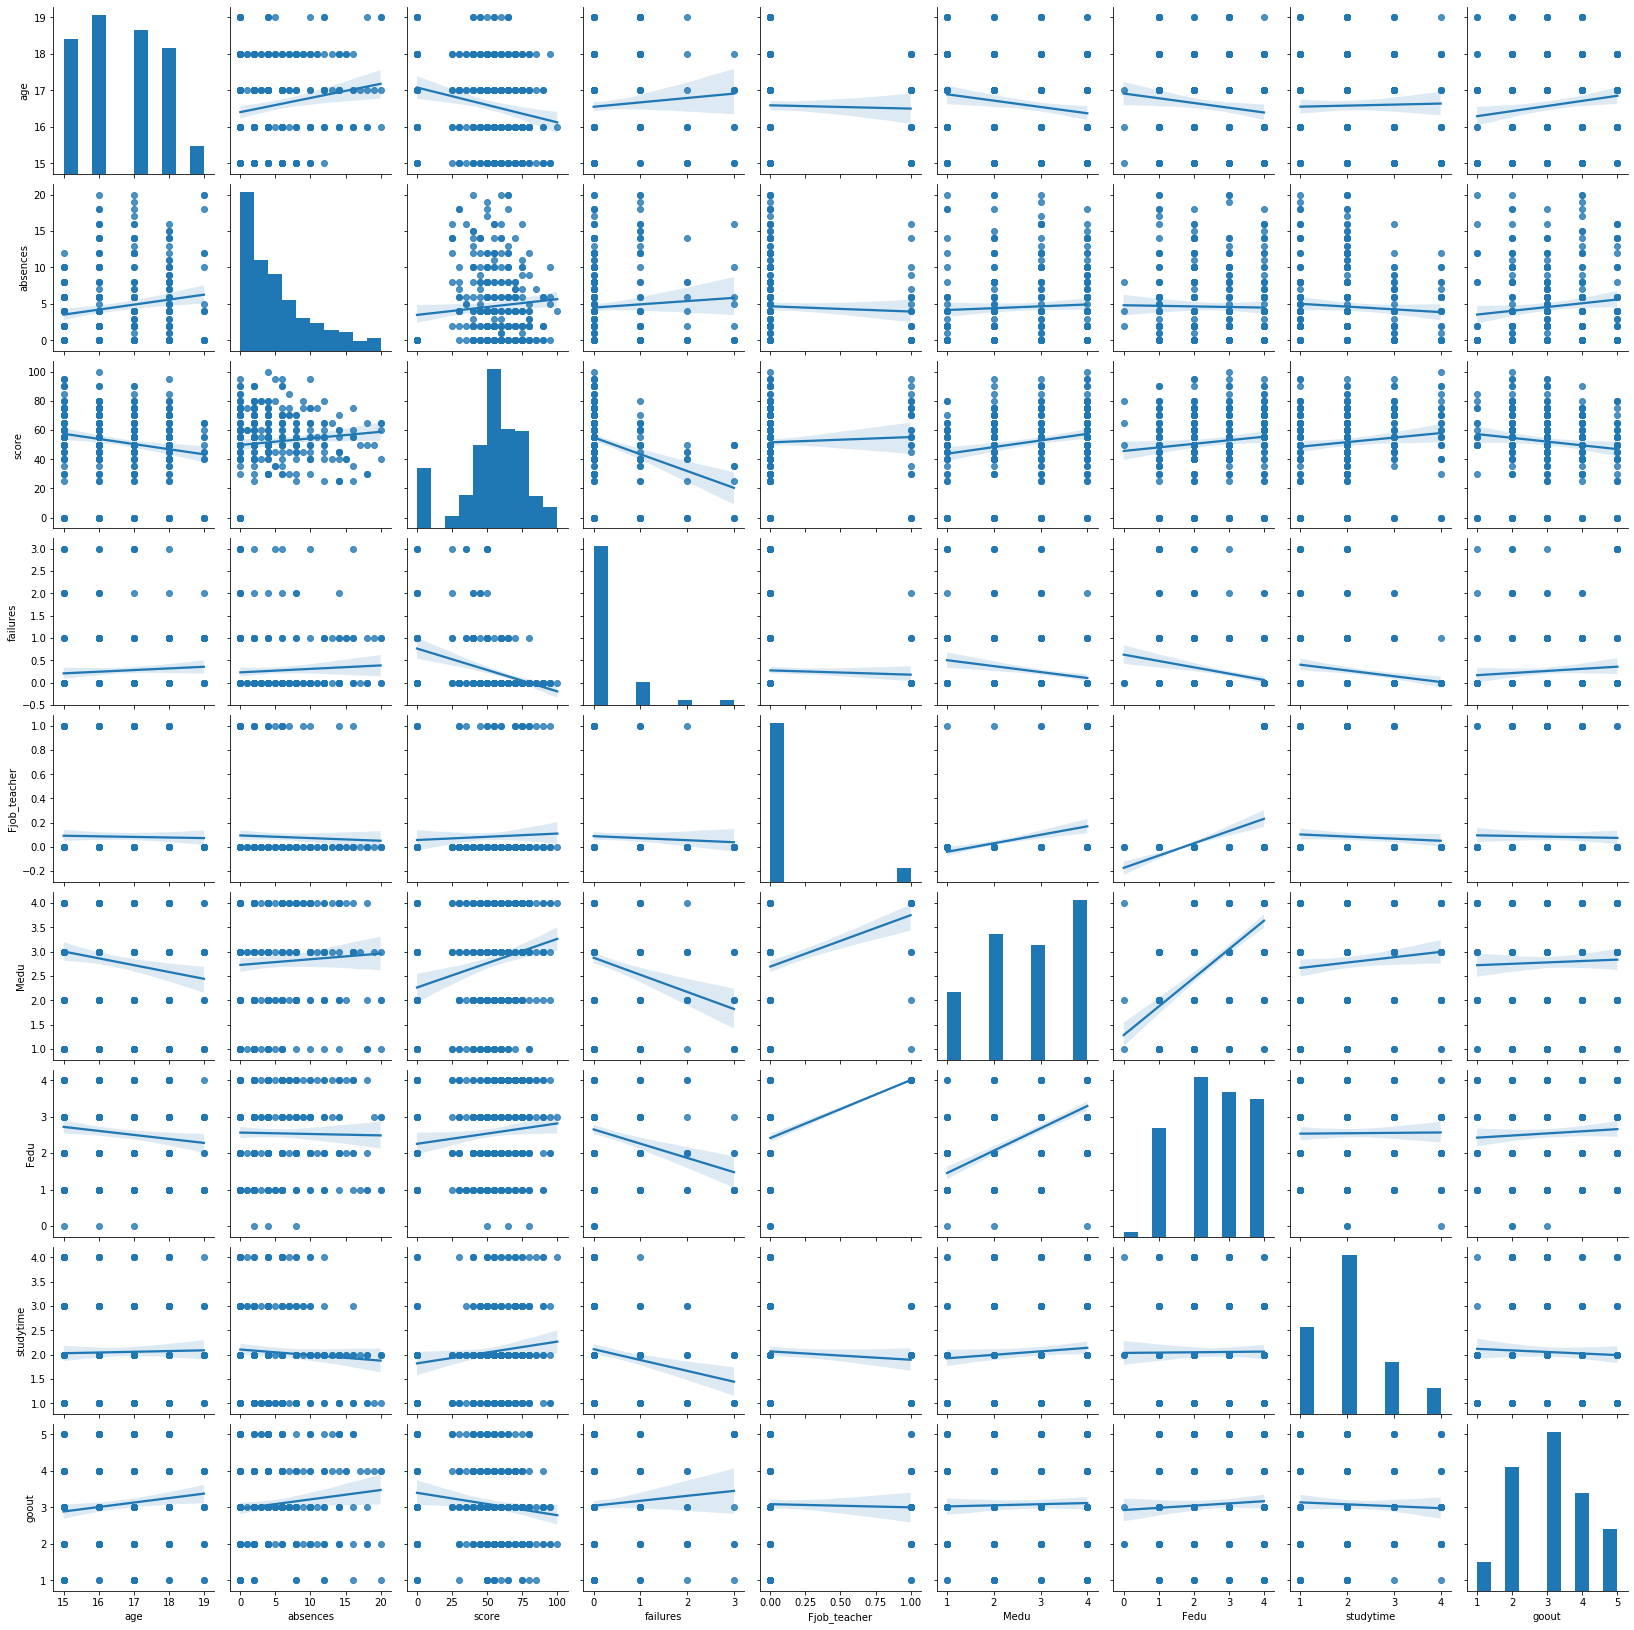

In [76]:
sns.pairplot(data[data.columns], kind='reg')

In [77]:
data.corr().round(1)

,age,absences,score,failures,Fjob_teacher,Medu,Fedu,studytime,goout
age,1.0,0.2,-0.2,0.1,-0.0,-0.2,-0.1,0.0,0.1
absences,0.2,1.0,0.1,0.1,-0.0,0.1,-0.0,-0.1,0.1
score,-0.2,0.1,1.0,-0.3,0.0,0.2,0.1,0.1,-0.1
failures,0.1,0.1,-0.3,1.0,-0.0,-0.2,-0.2,-0.2,0.1
Fjob_teacher,-0.0,-0.0,0.0,-0.0,1.0,0.3,0.4,-0.1,-0.0
Medu,-0.2,0.1,0.2,-0.2,0.3,1.0,0.6,0.1,0.0
Fedu,-0.1,-0.0,0.1,-0.2,0.4,0.6,1.0,0.0,0.1
studytime,0.0,-0.1,0.1,-0.2,-0.1,0.1,0.0,1.0,-0.0
goout,0.1,0.1,-0.1,0.1,-0.0,0.0,0.1,-0.0,1.0


Большой коэффициент корреляции есть между уровнями образования матери и отца, что логично, ведь людям свойственно искать себе пару из своего социального слоя, а образование является одним из параметров такой слой образующих. Убирать сей параметр из таблицы не будем на данном этапе, но полагаю, что стоит в дальнейшем сформировать новый признак, где значениями будут усреднённый уровень образования матери и отца.

## 11. Выводы

В результате EDA для анализа влияния условий жизни учащихся в возрасте от $15$ до $22$ лет на их успеваемость по математике были получены следующие выводы:

- таблица содержит крайне мало значений для предсказательного анализа и крайне много пустых значений. Во избежание потери данных подготовлено два датасета для дальнейшего анализа **data** и **data_purified**. Ценой за подобную очистку стало удаление $35.5\%$ данных. Заполнение отсутствующих значений проводилось с сохранением частотных характеристик выборок.

- В столбцах с возрастом, числом пропусков и оценкой на экзаменах обнаружен выбросы.

- В столбцах об образовании отца и о семейных отношениях содержались значения, отличные от декларируемых в определениях.

- Обнаружен столбец, не имевший описания в справке к данным, - **'studytime, granular'**

- Обнаружена заметная отрицательная корреляция между возрастом и оценкой, а также между количеством внеучебных неудач и оценкой. Это может говорить как о низком качестве данных, так и о необходимости учёта важных пропущенных при сборе параметрах (например, данные из разных стран, наличие подрабротки и пр.)

- Слабая положительная корреляция параметра absences и score может говорить как о наличии дополнительного образования, получаемого в ущерб основному школьному, так и об отсутствии какой-либо причинно-следственной зависимости.

- Столбец **'Fjob'** показал слабую статистическую важность. Однако, на его основе был создан столбец **'Fjob_teacher'**, показывающий, является ли отец обучающегося учителем или нет.

- Большой коэффициент корреляции есть между уровнями образования матери и отца, что объяснимо социально. В дальнейшем рекоммендуется сформировать новый признак, где значениями будут усреднённый уровень образования матери и отца.

- Параметры, которые предлагается использовать в дальнейшем для построения модели, это **'age', 'absences', 'score', 'failures', 'sex', 'address', 'Mjob', 'schoolsup', 'higher', 'romantic', 'Fjob_teacher', 'Medu', 'Fedu', 'studytime', 'goout'**. При этом, среди категориальных данных параметры **'address', 'Mjob', 'schoolsup', 'Fjob_teacher', 'Medu'** показали более высокую статистическую значимость, чем **'sex', 'higher', 'romantic', 'Fedu', 'studytime', 'goout'**.